In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/afm346-stock-value-dataset/stocks.csv
/kaggle/input/uber-july-price/UBER - July 19 2024.csv
/kaggle/input/crm-july-price/CRM - July 19 2024.csv
/kaggle/input/cmg-july-prices/CMG - jULY 19 2024.csv


In [2]:
# Load stock dataset into DataFrame
import pandas as pd
df = pd.read_csv('/kaggle/input/afm346-stock-value-dataset/stocks.csv')
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,MMM,124.281319,150.501678,150.510040,148.110367,148.561874,4307633.0
1,2020-01-03,MMM,123.211121,149.205688,149.381271,146.847824,148.010040,2950412.0
2,2020-01-06,MMM,123.328491,149.347824,149.423080,147.449829,148.118729,2389608.0
3,2020-01-07,MMM,122.831367,148.745819,149.255859,147.842804,149.063538,2598908.0
4,2020-01-08,MMM,124.716301,151.028427,151.755859,148.536789,148.829437,3298927.0


In [3]:
# Filter the stock data for the specified companies
selected_companies = ['CRM', 'UBER', 'CMG', 'KHC', 'EL', 'EXPE']
filtered_stocks_df = df[df['Symbol'].isin(selected_companies)].copy()

# Convert 'Date' column to datetime format
filtered_stocks_df.loc[:, 'Date'] = pd.to_datetime(filtered_stocks_df['Date'])

# Sort the data by date for each company
filtered_stocks_df = filtered_stocks_df.sort_values(by=['Symbol', 'Date'])

filtered_stocks_df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
118650,2020-01-02 00:00:00,CMG,17.163799,17.163799,17.183800,16.750601,16.799400,24365000.0
118651,2020-01-03 00:00:00,CMG,17.302601,17.302601,17.418800,17.064800,17.064800,21135000.0
118652,2020-01-06 00:00:00,CMG,17.160400,17.160400,17.256001,17.080000,17.240000,20260000.0
118653,2020-01-07 00:00:00,CMG,17.201599,17.201599,17.260000,17.087799,17.260000,12165000.0
118654,2020-01-08 00:00:00,CMG,17.134600,17.134600,17.340000,17.122999,17.122999,13125000.0


In [4]:
pip install ta

  Preparing metadata (setup.py) ... - done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=354486dd48ae0f2479496fb0155c2cc2770bc1f5568f127c33a8f3d6949fea9e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Handling missing values by forward filling
filtered_stocks_df.ffill(inplace=True)


def create_features(df, company):
    df = df[df['Symbol'] == company].copy()
    df['MA_5'] = df['Adj Close'].rolling(window=5).mean()
    df['MA_10'] = df['Adj Close'].rolling(window=10).mean()
    df['Lag_1'] = df['Adj Close'].shift(1)
    df['Lag_2'] = df['Adj Close'].shift(2)
    df['Lag_3'] = df['Adj Close'].shift(3)
    df = df.dropna()
    return df


# Apply feature engineering to each company
company_dfs = []
for company in selected_companies:
    company_dfs.append(create_features(filtered_stocks_df, company))

# Combine all company dataframes
processed_df = pd.concat(company_dfs)

# Display the first few rows of the processed dataframe
processed_df.head()

/tmp/ipykernel_18/1230549576.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_stocks_df.ffill(inplace=True)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,MA_5,MA_10,Lag_1,Lag_2,Lag_3
462179,2020-01-15,CRM,180.823792,181.059998,183.089996,180.619995,181.679993,3886600.0,181.129398,176.446515,181.882401,183.610168,179.964920
462180,2020-01-16,CRM,182.451675,182.690002,183.110001,180.960007,182.229996,3485300.0,181.746591,178.014467,180.823792,181.882401,183.610168
462181,2020-01-17,CRM,181.992264,182.229996,183.339996,181.360001,183.229996,4577000.0,182.152060,179.618372,182.451675,180.823792,181.882401
462182,2020-01-21,CRM,185.028305,185.270004,186.000000,181.500000,181.509995,6302400.0,182.435687,180.798830,181.992264,182.451675,180.823792
462183,2020-01-22,CRM,182.511597,182.750000,186.440002,182.690002,185.389999,4781800.0,182.561526,181.472949,185.028305,181.992264,182.451675


In [6]:
import ta  # Technical Analysis library

# Feature Engineering: Creating technical indicators and additional features
def create_advanced_features(df, company):
    df = df[df['Symbol'] == company].copy()
    df['MA_5'] = df['Adj Close'].rolling(window=5).mean()
    df['MA_10'] = df['Adj Close'].rolling(window=10).mean()
    df['Lag_1'] = df['Adj Close'].shift(1)
    df['Lag_2'] = df['Adj Close'].shift(2)
    df['Lag_3'] = df['Adj Close'].shift(3)
    df['RSI'] = ta.momentum.rsi(df['Adj Close'], window=14)
    df['Bollinger_High'] = ta.volatility.bollinger_hband(df['Adj Close'], window=20)
    df['Bollinger_Low'] = ta.volatility.bollinger_lband(df['Adj Close'], window=20)
    df['MACD'] = ta.trend.macd(df['Adj Close'], window_slow=26, window_fast=12)
    df['EMA_12'] = ta.trend.ema_indicator(df['Adj Close'], window=12)
    df['EMA_26'] = ta.trend.ema_indicator(df['Adj Close'], window=26)
    df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()
    df['Volume_MA_10'] = df['Volume'].rolling(window=10).mean()
    df['Day_Of_Week'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
    df = df.dropna()
    return df


# Apply feature engineering to each company
company_dfs = []
for company in selected_companies:
    company_dfs.append(create_advanced_features(filtered_stocks_df, company))

# Combine all company dataframes
processed_df = pd.concat(company_dfs)

# Display the first few rows of the processed dataframe
processed_df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,MA_5,MA_10,...,Bollinger_High,Bollinger_Low,MACD,EMA_12,EMA_26,Volume_MA_5,Volume_MA_10,Day_Of_Week,Month,Quarter
462195,2020-02-07,CRM,185.477722,185.720001,188.649994,185.649994,186.850006,3713100.0,186.096906,184.260306,...,187.576985,179.071072,3.349343,184.169051,180.819709,4543380.0,4109610.0,4,2,1
462196,2020-02-10,CRM,188.873276,189.119995,189.270004,185.559998,186.169998,3873500.0,186.835941,185.100208,...,188.373375,179.165518,3.476509,184.892778,181.416269,4367040.0,4073020.0,0,2,1
462197,2020-02-11,CRM,188.863297,189.110001,192.600006,188.649994,191.479996,4299200.0,186.989740,185.725391,...,189.141368,178.922838,3.535726,185.503627,181.967901,4430240.0,4158410.0,1,2,1
462198,2020-02-12,CRM,189.212845,189.460007,190.520004,186.770004,189.710007,4535400.0,187.782706,186.493388,...,189.876856,178.920395,3.569713,186.074276,182.504563,4104780.0,4333400.0,2,2,1
462199,2020-02-13,CRM,188.393906,188.639999,191.050003,188.419998,188.500000,3132100.0,188.164209,186.790001,...,190.261154,179.293108,3.490331,186.431142,182.940811,3910660.0,4275040.0,3,2,1


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Normalize/Scale the features
scaler = StandardScaler()

# Select numeric columns and scale them
numeric_columns = processed_df.drop(['Date', 'Symbol', 'Adj Close'], axis=1).columns
processed_df[numeric_columns] = scaler.fit_transform(processed_df[numeric_columns])

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Different imputation methods for different columns
filtered_stocks_df.loc[:, 'Adj Close'] = filtered_stocks_df['Adj Close'].ffill()
filtered_stocks_df.loc[:, 'Volume'] = filtered_stocks_df['Volume'].interpolate(method='linear')

# Check for remaining missing values
missing_values = filtered_stocks_df.isnull().sum()
print("Missing values after improved imputation:\n", missing_values)

Missing values after improved imputation:
 Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [9]:
import pandas as pd
import ta  # Technical Analysis library
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

def create_advanced_features(df, company):
    df = df[df['Symbol'] == company].copy()  # Use .copy() to avoid chained assignment issues

    # Creating Technical Indicators
    df.loc[:, 'MA_5'] = df['Adj Close'].rolling(window=5).mean()
    df.loc[:, 'MA_10'] = df['Adj Close'].rolling(window=10).mean()
    df.loc[:, 'Lag_1'] = df['Adj Close'].shift(1)
    df.loc[:, 'Lag_2'] = df['Adj Close'].shift(2)
    df.loc[:, 'Lag_3'] = df['Adj Close'].shift(3)
    df.loc[:, 'RSI'] = ta.momentum.RSIIndicator(df['Adj Close'], window=14).rsi()
    df.loc[:, 'Bollinger_High'] = ta.volatility.BollingerBands(df['Adj Close'], window=20).bollinger_hband()
    df.loc[:, 'Bollinger_Low'] = ta.volatility.BollingerBands(df['Adj Close'], window=20).bollinger_lband()
    df.loc[:, 'MACD'] = ta.trend.MACD(df['Adj Close'], window_slow=26, window_fast=12).macd()
    df.loc[:, 'EMA_12'] = ta.trend.EMAIndicator(df['Adj Close'], window=12).ema_indicator()
    df.loc[:, 'EMA_26'] = ta.trend.EMAIndicator(df['Adj Close'], window=26).ema_indicator()
    df.loc[:, 'Volume_MA_5'] = df['Volume'].rolling(window=5).mean()
    df.loc[:, 'Volume_MA_10'] = df['Volume'].rolling(window=10).mean()

    # Creating Date-Based Features
    df.loc[:, 'Day_Of_Week'] = df['Date'].dt.dayofweek
    df.loc[:, 'Month'] = df['Date'].dt.month
    df.loc[:, 'Quarter'] = df['Date'].dt.quarter
    df.loc[:, 'is_month_end'] = df['Date'].dt.is_month_end.astype(int)
    df.loc[:, 'is_month_start'] = df['Date'].dt.is_month_start.astype(int)
    df.loc[:, 'is_quarter_end'] = df['Date'].dt.is_quarter_end.astype(int)

    # Creating Interaction Features
    df.loc[:, 'RSI*Volume'] = df['RSI'] * df['Volume']
    df.loc[:, 'MACD*EMA_12'] = df['MACD'] * df['EMA_12']
    df.loc[:, 'Adj Close*Volume'] = df['Adj Close'] * df['Volume']
    df.loc[:, 'Adj Close/Volume'] = df['Adj Close'] / df['Volume']

    # Creating Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(df[['Adj Close', 'Volume']])
    poly_feature_names = poly.get_feature_names_out(['Adj Close', 'Volume'])
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
    df = df.join(poly_df, rsuffix='_poly')

    df = df.dropna()
    return df

def select_features_for_company(df, company):
    # Feature Engineering for the company
    company_df = create_advanced_features(df, company)
    
    # Defining features and target variable
    X = company_df.drop(['Date', 'Symbol', 'Adj Close'], axis=1)
    y = company_df['Adj Close']

    # Using Linear Regression model for RFE
    model = LinearRegression()
    
    # Cross-validation to find the optimal number of features
    best_score = float('-inf')
    best_num_features = None
    best_features = None

    for num_features in range(5, len(X.columns) + 1, 5):  # Evaluate in steps of 5 features
        rfe = RFE(model, n_features_to_select=num_features)
        X_rfe = rfe.fit_transform(X, y)
        score = cross_val_score(model, X_rfe, y, cv=5, scoring='neg_mean_squared_error').mean()

        if score > best_score:
            best_score = score
            best_num_features = num_features
            best_features = X.columns[rfe.support_]

    # Scale the selected features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(company_df[best_features])
    company_df[best_features] = X_scaled

    # Return the processed company dataframe with selected features
    return company_df, best_features

# Apply tailored feature engineering and selection to each company
processed_dfs = []
selected_features_dict = {}

for company in selected_companies:
    processed_company_df, selected_features = select_features_for_company(filtered_stocks_df, company)
    processed_dfs.append(processed_company_df)
    selected_features_dict[company] = selected_features

# Combine all processed company dataframes
final_processed_df = pd.concat(processed_dfs)

# Display the first few rows of the final processed dataframe
print(final_processed_df.head())
print(selected_features_dict)

             Date Symbol   Adj Close       Close        High       Low  \
462195 2020-02-07    CRM  185.477722  185.720001  188.649994 -0.384994   
462196 2020-02-10    CRM  188.873276  189.119995  189.270004 -0.386378   
462197 2020-02-11    CRM  188.863297  189.110001  192.600006 -0.338868   
462198 2020-02-12    CRM  189.212845  189.460007  190.520004 -0.367774   
462199 2020-02-13    CRM  188.393906  188.639999  191.050003 -0.342405   

              Open     Volume        MA_5       MA_10  ...  is_quarter_end  \
462195  186.850006  3713100.0  186.096906  184.260306  ...               0   
462196  186.169998  3873500.0  186.835941  185.100208  ...               0   
462197  191.479996  4299200.0  186.989740  185.725391  ...               0   
462198  189.710007  4535400.0  187.782706  186.493388  ...               0   
462199  188.500000  3132100.0  188.164209  186.790001  ...               0   

          RSI*Volume  MACD*EMA_12  Adj Close*Volume  Adj Close/Volume  \
462195  2.237

In [10]:
# Outlier Detection using Z-score
def detect_outliers(df, features):
    outliers = pd.DataFrame()
    for feature in features:
        df['z_score'] = (df[feature] - df[feature].mean()) / df[feature].std()
        outliers[feature] = df[df['z_score'].abs() > 3][feature]
    return outliers

# Detect outliers in the processed dataframe
numeric_columns = processed_df.drop(['Date', 'Symbol', 'Adj Close'], axis=1).columns
outliers = detect_outliers(processed_df, numeric_columns)
print("Detected outliers:\n", outliers)

# Handle outliers (e.g., remove or cap them)
processed_df = processed_df[(processed_df['z_score'].abs() <= 3) | (processed_df['z_score'].isnull())]
processed_df.drop(columns='z_score', inplace=True)

Detected outliers:
         Close  High  Low  Open    Volume  MA_5  MA_10  Lag_1  Lag_2  Lag_3  \
462334    NaN   NaN  NaN   NaN  4.393546   NaN    NaN    NaN    NaN    NaN   
462402    NaN   NaN  NaN   NaN  3.482746   NaN    NaN    NaN    NaN    NaN   
463279    NaN   NaN  NaN   NaN  4.691491   NaN    NaN    NaN    NaN    NaN   
516435    NaN   NaN  NaN   NaN  8.446457   NaN    NaN    NaN    NaN    NaN   
516436    NaN   NaN  NaN   NaN  4.194288   NaN    NaN    NaN    NaN    NaN   
...       ...   ...  ...   ...       ...   ...    ...    ...    ...    ...   
119296    NaN   NaN  NaN   NaN  5.085373   NaN    NaN    NaN    NaN    NaN   
119360    NaN   NaN  NaN   NaN  3.388965   NaN    NaN    NaN    NaN    NaN   
119484    NaN   NaN  NaN   NaN  5.900953   NaN    NaN    NaN    NaN    NaN   
119547    NaN   NaN  NaN   NaN  4.823561   NaN    NaN    NaN    NaN    NaN   
119710    NaN   NaN  NaN   NaN  3.312982   NaN    NaN    NaN    NaN    NaN   

        ...  Bollinger_High  Bollinger_Low 

In [11]:
from sklearn.preprocessing import RobustScaler

# Normalize/Scale the features using RobustScaler
scaler = RobustScaler()

# Select numeric columns and scale them
processed_df[numeric_columns] = scaler.fit_transform(processed_df[numeric_columns])

In [12]:
import ta

# Create additional lag features
processed_df['Lag_5'] = processed_df['Adj Close'].shift(5)
processed_df['Lag_7'] = processed_df['Adj Close'].shift(7)
processed_df['Lag_14'] = processed_df['Adj Close'].shift(14)

# Rolling window statistics
processed_df['Rolling_Mean_7'] = processed_df['Adj Close'].rolling(window=7).mean()
processed_df['Rolling_Std_7'] = processed_df['Adj Close'].rolling(window=7).std()
processed_df['Rolling_Mean_14'] = processed_df['Adj Close'].rolling(window=14).mean()
processed_df['Rolling_Std_14'] = processed_df['Adj Close'].rolling(window=14).std()

# Additional technical indicators
processed_df['Stoch_Osc'] = ta.momentum.stoch(processed_df['High'], processed_df['Low'], processed_df['Adj Close'], window=14)
processed_df['ADX'] = ta.trend.adx(processed_df['High'], processed_df['Low'], processed_df['Adj Close'], window=14)
processed_df['CCI'] = ta.trend.cci(processed_df['High'], processed_df['Low'], processed_df['Adj Close'], window=20)

# Interaction features
processed_df['RSI*Adj_Close'] = processed_df['RSI'] * processed_df['Adj Close']
processed_df['EMA_12*Volume'] = processed_df['EMA_12'] * processed_df['Volume']
processed_df['Stoch_Osc*ADX'] = processed_df['Stoch_Osc'] * processed_df['ADX']

# Seasonality features
processed_df['Day_of_Week'] = processed_df['Date'].dt.dayofweek
processed_df['Day_of_Month'] = processed_df['Date'].dt.day
processed_df['is_month_end'] = processed_df['Date'].dt.is_month_end.astype(int)
processed_df['is_quarter_end'] = processed_df['Date'].dt.is_quarter_end.astype(int)
processed_df['is_year_end'] = processed_df['Date'].dt.is_year_end.astype(int)

# Volume-based features
processed_df['VPT'] = (processed_df['Volume'] * ((processed_df['Adj Close'] - processed_df['Adj Close'].shift(1)) / processed_df['Adj Close'].shift(1))).cumsum()
processed_df['OBV'] = ta.volume.on_balance_volume(processed_df['Adj Close'], processed_df['Volume'])
processed_df['ADI'] = ta.volume.acc_dist_index(processed_df['High'], processed_df['Low'], processed_df['Adj Close'], processed_df['Volume'])

# Trend indicators
processed_df['MA_50'] = processed_df['Adj Close'].rolling(window=50).mean()
processed_df['MA_100'] = processed_df['Adj Close'].rolling(window=100).mean()
processed_df['Trend_Strength'] = processed_df['MA_50'] / processed_df['MA_100']

# Drop any rows with NaN values created by feature engineering
processed_df.dropna(inplace=True)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import ElasticNetCV
from statsmodels.tsa.seasonal import seasonal_decompose
import ta

# Assuming processed_df is already created and contains the required features

# Drop date and symbol columns for Isolation Forest
iso_features = processed_df.drop(columns=['Date', 'Symbol'])

# Check if iso_features contains any invalid data types or is empty
if iso_features.empty:
    raise ValueError("Feature DataFrame iso_features is empty.")
if not all(np.issubdtype(dtype, np.number) for dtype in iso_features.dtypes):
    raise ValueError("Feature DataFrame iso_features contains non-numeric data types.")

# Isolation Forest for outlier detection
iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(iso_features)
processed_df = processed_df[yhat != -1].copy()  # Ensure we get a copy

# Lagged moving averages
processed_df.loc[:, 'Lag_MA_5'] = processed_df['Adj Close'].shift(5).rolling(window=5).mean()
processed_df.loc[:, 'Lag_MA_10'] = processed_df['Adj Close'].shift(10).rolling(window=10).mean()

# Fourier Transform
processed_df.loc[:, 'Fourier'] = np.fft.fft(processed_df['Adj Close']).real

# Time Series Decomposition
result = seasonal_decompose(processed_df['Adj Close'], model='multiplicative', period=30)
processed_df.loc[:, 'Trend'] = result.trend
processed_df.loc[:, 'Seasonal'] = result.seasonal
processed_df.loc[:, 'Residual'] = result.resid

# Drop any rows with NaN values created by feature engineering
processed_df.dropna(inplace=True)

# Define features and target variable
X = processed_df.drop(['Date', 'Symbol', 'Adj Close'], axis=1)
y = processed_df['Adj Close']

# Check if X contains any invalid data types or is empty
if X.empty:
    raise ValueError("Feature DataFrame X is empty.")
if not all(np.issubdtype(dtype, np.number) for dtype in X.dtypes):
    raise ValueError("Feature DataFrame X contains non-numeric data types.")

# Print the first few rows of X for debugging
print("First few rows of X before feature selection:")
print(X.head())

# ElasticNet for feature selection
elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X, y)
feature_importances_enet = pd.Series(elastic_net.coef_, index=X.columns)

# Select important features
important_features_enet = feature_importances_enet[feature_importances_enet != 0].index

# Check if important features are empty and handle the case
if important_features_enet.empty:
    print("No features were selected by ElasticNet. Using all features.")
    important_features_enet = X.columns

X = X[important_features_enet]

# Print the first few rows of X after feature selection
print("First few rows of X after feature selection:")
print(X.head())

# Quantile Transformer
scaler = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to a DataFrame to retain feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled DataFrame for debugging
print("First few rows of X_scaled_df:")
print(X_scaled_df.head())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


First few rows of X before feature selection:
           Close      High       Low      Open    Volume      MA_5     MA_10  \
462313  0.782885  0.781963  0.804330  0.791295 -0.302324  0.794035  0.790565   
462314  0.810341  0.792405  0.809096  0.785600 -0.241412  0.797128  0.794280   
462315  0.797582  0.775067  0.792892  0.785198 -0.256832  0.801377  0.798447   
462316  0.818625  0.795229  0.815360  0.804695 -0.242739  0.809928  0.803206   
462317  0.874340  0.859588  0.855531  0.836857  0.028701  0.826372  0.808658   

           Lag_1     Lag_2     Lag_3  ...            ADI       MA_50  \
462313  0.796161  0.779480  0.779384  ...  451105.697087  184.055175   
462314  0.786391  0.796005  0.779050  ...  456675.644109  184.476825   
462315  0.813895  0.786237  0.795566  ...  462170.227613  184.789616   
462316  0.801113  0.813735  0.785803  ...  466843.548168  185.147549   
462317  0.822192  0.800956  0.813286  ...  469702.932664  185.705420   

            MA_100  Trend_Strength    La

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10126.917901415378, tolerance: 3031.195303104116
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28910.339566238225, tolerance: 3031.195303104116
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41011.80948681012, tolerance: 3031.195303104116
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceW

No features were selected by ElasticNet. Using all features.
First few rows of X after feature selection:
           Close      High       Low      Open    Volume      MA_5     MA_10  \
462313  0.782885  0.781963  0.804330  0.791295 -0.302324  0.794035  0.790565   
462314  0.810341  0.792405  0.809096  0.785600 -0.241412  0.797128  0.794280   
462315  0.797582  0.775067  0.792892  0.785198 -0.256832  0.801377  0.798447   
462316  0.818625  0.795229  0.815360  0.804695 -0.242739  0.809928  0.803206   
462317  0.874340  0.859588  0.855531  0.836857  0.028701  0.826372  0.808658   

           Lag_1     Lag_2     Lag_3  ...            ADI       MA_50  \
462313  0.796161  0.779480  0.779384  ...  451105.697087  184.055175   
462314  0.786391  0.796005  0.779050  ...  456675.644109  184.476825   
462315  0.813895  0.786237  0.795566  ...  462170.227613  184.789616   
462316  0.801113  0.813735  0.785803  ...  466843.548168  185.147549   
462317  0.822192  0.800956  0.813286  ...  469702.932

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
import ta

# Ensure symbol_data is a dictionary
symbol_data = dict()  # Ensure it is a dictionary
print(f"Initial type of symbol_data: {type(symbol_data)}")  # Debugging: print the initial type

# Function to preprocess the data for a single symbol
def preprocess_symbol_data(symbol_df):
    # Drop date and symbol columns
    iso_features = symbol_df.drop(columns=['Date', 'Symbol'])

    # Check if iso_features contains any invalid data types or is empty
    if iso_features.empty:
        raise ValueError(f"Feature DataFrame iso_features for symbol {symbol_df['Symbol'].iloc[0]} is empty.")
    if not all(np.issubdtype(dtype, np.number) for dtype in iso_features.dtypes):
        raise ValueError(f"Feature DataFrame iso_features for symbol {symbol_df['Symbol'].iloc[0]} contains non-numeric data types.")

    # Isolation Forest for outlier detection
    iso = IsolationForest(contamination=0.01)
    yhat = iso.fit_predict(iso_features)
    symbol_df = symbol_df[yhat != -1].copy()  # Ensure we get a copy
    
     # Lagged moving averages
    symbol_df['Lag_MA_5'] = symbol_df['Adj Close'].shift(5).rolling(window=5).mean()
    symbol_df['Lag_MA_10'] = symbol_df['Adj Close'].shift(10).rolling(window=10).mean()
    symbol_df['Lag_MA_15'] = symbol_df['Adj Close'].shift(15).rolling(window=15).mean()
    symbol_df['Lag_MA_20'] = symbol_df['Adj Close'].shift(20).rolling(window=20).mean()

    # Fourier Transform
    symbol_df['Fourier'] = np.fft.fft(symbol_df['Adj Close']).real

    # Time Series Decomposition
    result = seasonal_decompose(symbol_df['Adj Close'], model='multiplicative', period=30)
    symbol_df['Trend'] = result.trend
    symbol_df['Seasonal'] = result.seasonal
    symbol_df['Residual'] = result.resid

    # Additional technical indicators
    symbol_df['RSI'] = ta.momentum.rsi(symbol_df['Adj Close'], window=14)
    symbol_df['MACD'] = ta.trend.macd_diff(symbol_df['Adj Close'])
    symbol_df['Bollinger_High'] = ta.volatility.bollinger_hband(symbol_df['Adj Close'])
    symbol_df['Bollinger_Low'] = ta.volatility.bollinger_lband(symbol_df['Adj Close'])
    symbol_df['EMA_12'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=12)
    symbol_df['EMA_26'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=26)
    symbol_df['SMA_50'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=50)
    symbol_df['SMA_200'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=200)
    symbol_df['ADX'] = ta.trend.adx(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close'])

    # Interaction features
    symbol_df['RSI*Adj_Close'] = symbol_df['RSI'] * symbol_df['Adj Close']
    symbol_df['EMA_12*Volume'] = symbol_df['EMA_12'] * symbol_df['Volume']
    symbol_df['Stoch_Osc*ADX'] = ta.momentum.stoch(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close']) * symbol_df['ADX']

    # Seasonality features
    symbol_df['Day_of_Week'] = symbol_df['Date'].dt.dayofweek
    symbol_df['Day_of_Month'] = symbol_df['Date'].dt.day
    symbol_df['Month'] = symbol_df['Date'].dt.month
    symbol_df['Quarter'] = symbol_df['Date'].dt.quarter
    symbol_df['is_month_end'] = symbol_df['Date'].dt.is_month_end.astype(int)
    symbol_df['is_quarter_end'] = symbol_df['Date'].dt.is_quarter_end.astype(int)
    symbol_df['is_year_end'] = symbol_df['Date'].dt.is_year_end.astype(int)

    # Volume-based features
    symbol_df['VPT'] = ta.volume.volume_price_trend(symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['OBV'] = ta.volume.on_balance_volume(symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['ADI'] = ta.volume.acc_dist_index(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['CMF'] = ta.volume.chaikin_money_flow(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['FI'] = ta.volume.force_index(symbol_df['Adj Close'], symbol_df['Volume'])

    # Trend indicators
    symbol_df['MA_50'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=50)
    symbol_df['MA_100'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=100)
    symbol_df['MA_200'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=200)
    symbol_df['EMA_50'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=50)
    symbol_df['EMA_100'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=100)
    symbol_df['Trend_Strength'] = symbol_df['EMA_50'] / symbol_df['EMA_100']
    
     # Drop any rows with NaN values created by feature engineering
    symbol_df.dropna(inplace=True)

    # Define features and target variable
    X = symbol_df.drop(['Date', 'Symbol', 'Adj Close'], axis=1)
    y = symbol_df['Adj Close']

    # Identify and drop non-numeric columns
    non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
    X.drop(columns=non_numeric_cols, inplace=True)
    
        # Feature Selection using ElasticNet
    elastic_net = ElasticNetCV(cv=5, random_state=42)
    elastic_net.fit(X, y)
    feature_importances_enet = pd.Series(elastic_net.coef_, index=X.columns)
    important_features_enet = feature_importances_enet[feature_importances_enet != 0].index

    if important_features_enet.empty:
        print(f"No features were selected by ElasticNet for symbol {symbol_df['Symbol'].iloc[0]}. Using all features.")
        important_features_enet = X.columns

    X = X[important_features_enet]
    
        # Scaling
    scaler = QuantileTransformer(output_distribution='normal', n_quantiles=min(1000, len(X)))
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    return X_scaled_df, y

# Assuming processed_df is already created and contains the required features
# Identify unique symbols
symbols = processed_df['Symbol'].unique()

# Create a dictionary to store the preprocessed data for each symbol
symbol_data = dict()  # Ensure it is a dictionary
print(f"Type of symbol_data after re-initialization: {type(symbol_data)}")  # Debugging: print the type to confirm it's a dictionary

# Process each symbol separately
for symbol in symbols:
    symbol_df = processed_df[processed_df['Symbol'] == symbol].copy()
    X_scaled_df, y = preprocess_symbol_data(symbol_df)
    symbol_data[symbol] = (X_scaled_df, y)
    print(f"Processed {symbol}: Type of symbol_data is still {type(symbol_data)}")  # Debugging: confirm it's still a dictionary
    
    # Verify the structure of symbol_data
print(f"Final type of symbol_data: {type(symbol_data)}")
print(symbol_data.keys())  # Should print the list of symbols

Initial type of symbol_data: <class 'dict'>
Type of symbol_data after re-initialization: <class 'dict'>


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Processed CRM: Type of symbol_data is still <class 'dict'>


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Processed UBER: Type of symbol_data is still <class 'dict'>


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.6227599063277, tolerance: 6.14970369497488
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.76857980947534, tolerance: 6.14970369497488
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260.10722066977905, tol

No features were selected by ElasticNet for symbol CMG. Using all features.
Processed CMG: Type of symbol_data is still <class 'dict'>


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5023351499744422, tolerance: 0.4758474430308351
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5715085458432441, tolerance: 0.4758474430308351
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.561041071538511

Processed KHC: Type of symbol_data is still <class 'dict'>


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Processed EL: Type of symbol_data is still <class 'dict'>


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Processed EXPE: Type of symbol_data is still <class 'dict'>
Final type of symbol_data: <class 'dict'>
dict_keys(['CRM', 'UBER', 'CMG', 'KHC', 'EL', 'EXPE'])


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
import ta
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the most recent CMG stock data
file_path = '/kaggle/input/cmg-july-prices/CMG - jULY 19 2024.csv'
cmg_stock_data = pd.read_csv(file_path)
cmg_stock_data['Date'] = pd.to_datetime(cmg_stock_data['Date'])

# Add 'Symbol' column for consistency with preprocessing function
cmg_stock_data['Symbol'] = 'CMG'

# Function to preprocess the data for a single symbol
def preprocess_symbol_data(symbol_df):
    # Drop date and symbol columns
    iso_features = symbol_df.drop(columns=['Date', 'Symbol'])

    # Check if iso_features contains any invalid data types or is empty
    if iso_features.empty:
        raise ValueError(f"Feature DataFrame iso_features for symbol {symbol_df['Symbol'].iloc[0]} is empty.")
    if not all(np.issubdtype(dtype, np.number) for dtype in iso_features.dtypes):
        raise ValueError(f"Feature DataFrame iso_features for symbol {symbol_df['Symbol'].iloc[0]} contains non-numeric data types.")

    # Isolation Forest for outlier detection
    iso = IsolationForest(contamination=0.01)
    yhat = iso.fit_predict(iso_features)
    symbol_df = symbol_df[yhat != -1].copy()  # Ensure we get a copy
    
    # Lagged moving averages
    symbol_df['Lag_MA_5'] = symbol_df['Adj Close'].shift(5).rolling(window=5).mean()
    symbol_df['Lag_MA_10'] = symbol_df['Adj Close'].shift(10).rolling(window=10).mean()
    symbol_df['Lag_MA_15'] = symbol_df['Adj Close'].shift(15).rolling(window=15).mean()
    symbol_df['Lag_MA_20'] = symbol_df['Adj Close'].shift(20).rolling(window=20).mean()

    # Fourier Transform
    symbol_df['Fourier'] = np.fft.fft(symbol_df['Adj Close']).real

    # Time Series Decomposition
    result = seasonal_decompose(symbol_df['Adj Close'], model='multiplicative', period=30)
    symbol_df['Trend'] = result.trend
    symbol_df['Seasonal'] = result.seasonal
    symbol_df['Residual'] = result.resid

    # Additional technical indicators
    symbol_df['RSI'] = ta.momentum.rsi(symbol_df['Adj Close'], window=14)
    symbol_df['MACD'] = ta.trend.macd_diff(symbol_df['Adj Close'])
    symbol_df['Bollinger_High'] = ta.volatility.bollinger_hband(symbol_df['Adj Close'])
    symbol_df['Bollinger_Low'] = ta.volatility.bollinger_lband(symbol_df['Adj Close'])
    symbol_df['EMA_12'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=12)
    symbol_df['EMA_26'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=26)
    symbol_df['SMA_50'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=50)
    symbol_df['SMA_200'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=200)
    symbol_df['ADX'] = ta.trend.adx(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close'])

    # Interaction features
    symbol_df['RSI*Adj_Close'] = symbol_df['RSI'] * symbol_df['Adj Close']
    symbol_df['EMA_12*Volume'] = symbol_df['EMA_12'] * symbol_df['Volume']
    symbol_df['Stoch_Osc*ADX'] = ta.momentum.stoch(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close']) * symbol_df['ADX']

    # Seasonality features
    symbol_df['Day_of_Week'] = symbol_df['Date'].dt.dayofweek
    symbol_df['Day_of_Month'] = symbol_df['Date'].dt.day
    symbol_df['Month'] = symbol_df['Date'].dt.month
    symbol_df['Quarter'] = symbol_df['Date'].dt.quarter
    symbol_df['is_month_end'] = symbol_df['Date'].dt.is_month_end.astype(int)
    symbol_df['is_quarter_end'] = symbol_df['Date'].dt.is_quarter_end.astype(int)
    symbol_df['is_year_end'] = symbol_df['Date'].dt.is_year_end.astype(int)

    # Volume-based features
    symbol_df['VPT'] = ta.volume.volume_price_trend(symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['OBV'] = ta.volume.on_balance_volume(symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['ADI'] = ta.volume.acc_dist_index(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['CMF'] = ta.volume.chaikin_money_flow(symbol_df['High'], symbol_df['Low'], symbol_df['Adj Close'], symbol_df['Volume'])
    symbol_df['FI'] = ta.volume.force_index(symbol_df['Adj Close'], symbol_df['Volume'])

    # Trend indicators
    symbol_df['MA_50'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=50)
    symbol_df['MA_100'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=100)
    symbol_df['MA_200'] = ta.trend.sma_indicator(symbol_df['Adj Close'], window=200)
    symbol_df['EMA_50'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=50)
    symbol_df['EMA_100'] = ta.trend.ema_indicator(symbol_df['Adj Close'], window=100)
    symbol_df['Trend_Strength'] = symbol_df['EMA_50'] / symbol_df['EMA_100']
    
    # Drop any rows with NaN values created by feature engineering
    symbol_df.dropna(inplace=True)

    # Define features and target variable
    X = symbol_df.drop(['Date', 'Symbol', 'Adj Close'], axis=1)
    y = symbol_df['Adj Close']

    # Identify and drop non-numeric columns
    non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
    X.drop(columns=non_numeric_cols, inplace=True)
    
    # Feature Selection using ElasticNet
    elastic_net = ElasticNetCV(cv=5, random_state=42)
    elastic_net.fit(X, y)
    feature_importances_enet = pd.Series(elastic_net.coef_, index=X.columns)
    important_features_enet = feature_importances_enet[feature_importances_enet != 0].index

    if important_features_enet.empty:
        print(f"No features were selected by ElasticNet for symbol {symbol_df['Symbol'].iloc[0]}. Using all features.")
        important_features_enet = X.columns

    X = X[important_features_enet]
    
    # Scaling
    scaler = QuantileTransformer(output_distribution='normal', n_quantiles=min(1000, len(X)))
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    return X_scaled_df, y

# Preprocess the CMG data
X_scaled_df, y = preprocess_symbol_data(cmg_stock_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


/tmp/ipykernel_18/3298562633.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cmg_stock_data.fillna(method='ffill', inplace=True)  # Forward fill NaN values
/tmp/ipykernel_18/3298562633.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cmg_stock_data.fillna(method='bfill', inplace=True)  # Backward fill NaN values to handle edge cases
/tmp/ipykernel_18/3298562633.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Mean Squared Error: 0.7487471294177148
R^2 Score: 0.9939578748048182


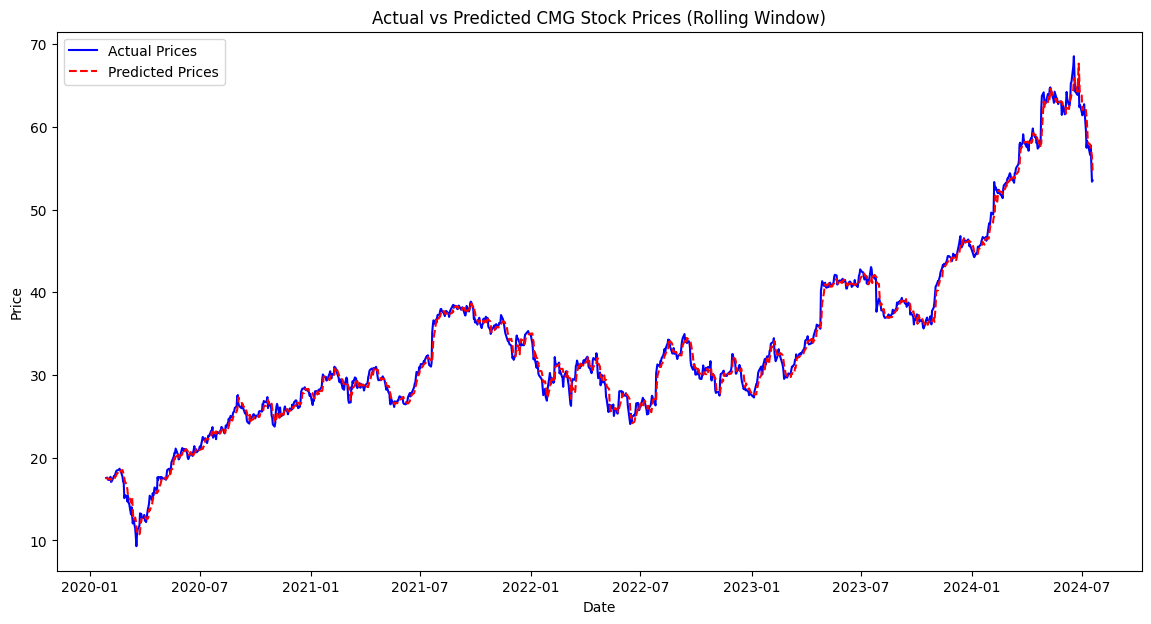

In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ta

cmg_stock_data['Date'] = pd.to_datetime(cmg_stock_data['Date'])

# Ensure data is sorted by date
cmg_stock_data = cmg_stock_data.sort_values(by='Date')

# Calculate the required features if they are missing
if 'Stoch_Osc' not in cmg_stock_data.columns:
    cmg_stock_data['Stoch_Osc'] = ta.momentum.stoch(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
if 'Stoch_Osc*ADX' not in cmg_stock_data.columns:
    cmg_stock_data['ADX'] = ta.trend.adx(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
    cmg_stock_data['Stoch_Osc*ADX'] = cmg_stock_data['Stoch_Osc'] * cmg_stock_data['ADX']
if 'ADI' not in cmg_stock_data.columns:
    cmg_stock_data['ADI'] = ta.volume.acc_dist_index(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])

# Handle NaN values by filling them with appropriate imputation strategies
cmg_stock_data.fillna(method='ffill', inplace=True)  # Forward fill NaN values
cmg_stock_data.fillna(method='bfill', inplace=True)  # Backward fill NaN values to handle edge cases

# Verify and select key features
key_features = ['Stoch_Osc', 'Stoch_Osc*ADX', 'ADI']
assert all(feature in cmg_stock_data.columns for feature in key_features), "Some key features are missing."

# Extract relevant features and target
price_df = cmg_stock_data[['Date', 'Adj Close'] + key_features].copy()

# Define features (X) and target (y)
X = price_df[key_features]
y = price_df['Adj Close']

# Ensure there are no NaN values in X and y
X.dropna(inplace=True)
y.dropna(inplace=True)

# Initialize the model with the best parameters
best_n_neighbors = 20
model = KNeighborsRegressor(n_neighbors=best_n_neighbors, metric='euclidean', weights='distance')

# Rolling window prediction
window_size = 5  # Predicting the price 5 days ahead
predictions = []

# Iterate over the dataset to predict using a rolling window approach
for i in range(len(X) - window_size):
    X_train = X.iloc[i:i + window_size]
    y_train = y.iloc[i:i + window_size]
    current_n_neighbors = min(best_n_neighbors, len(X_train))  # Adjust n_neighbors
    model.set_params(n_neighbors=current_n_neighbors)
    model.fit(X_train, y_train)
    X_test = X.iloc[i + window_size:i + window_size + 1]
    if len(X_test) == 0:  # Ensure X_test is not empty
        continue
    prediction = model.predict(X_test)
    predictions.append(prediction[0])

# Actual values for comparison
actual_values = y[window_size:].values

# Calculate MSE and R^2 score
mse = mean_squared_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(price_df['Date'][window_size:], actual_values, label='Actual Prices', color='blue')
plt.plot(price_df['Date'][window_size:], predictions, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted CMG Stock Prices (Rolling Window)')
plt.legend()
plt.show()

Backtest Mean Squared Error: 0.7487471294177148
Backtest R^2 Score: 0.9939578748048182


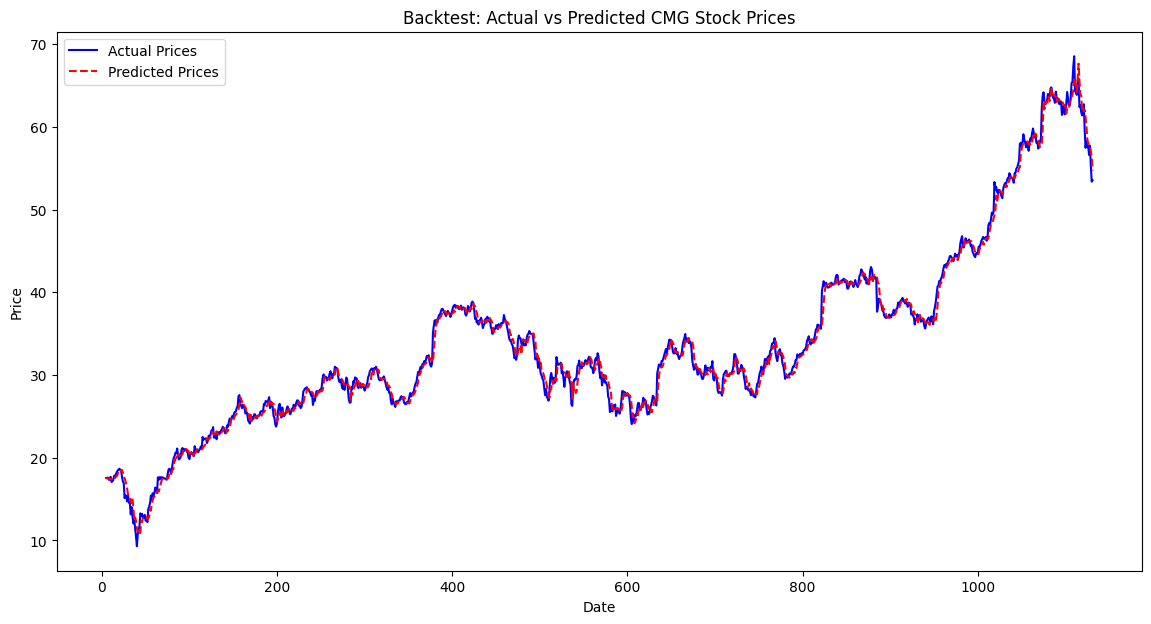

In [17]:
import numpy as np

# Assuming processed_df and model are already defined

# Function to backtest the model
def backtest_model(model, data, target, window_size=5):
    predictions = []
    dates = []
    
    for i in range(len(data) - window_size):
        X_train = data.iloc[i:i + window_size]
        y_train = target.iloc[i:i + window_size]
        current_n_neighbors = min(best_n_neighbors, len(X_train))
        model.set_params(n_neighbors=current_n_neighbors)
        model.fit(X_train, y_train)
        X_test = data.iloc[i + window_size:i + window_size + 1]
        if len(X_test) == 0:
            continue
        prediction = model.predict(X_test)
        predictions.append(prediction[0])
        dates.append(data.index[i + window_size])

    return np.array(predictions), np.array(dates)

# Extract features and target
X = price_df[key_features]
y = price_df['Adj Close']

# Perform backtesting
predictions, dates = backtest_model(model, X, y)

# Calculate metrics
actual_values = y[window_size:]
mse = mean_squared_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)
print(f"Backtest Mean Squared Error: {mse}")
print(f"Backtest R^2 Score: {r2}")

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(dates, actual_values, label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Backtest: Actual vs Predicted CMG Stock Prices')
plt.legend()
plt.show()

Enhanced Backtest Mean Squared Error: 1.6817698689463891
Enhanced Backtest Mean Absolute Error: 0.9386322316784458
Enhanced Backtest R^2 Score: 0.9863085039372179


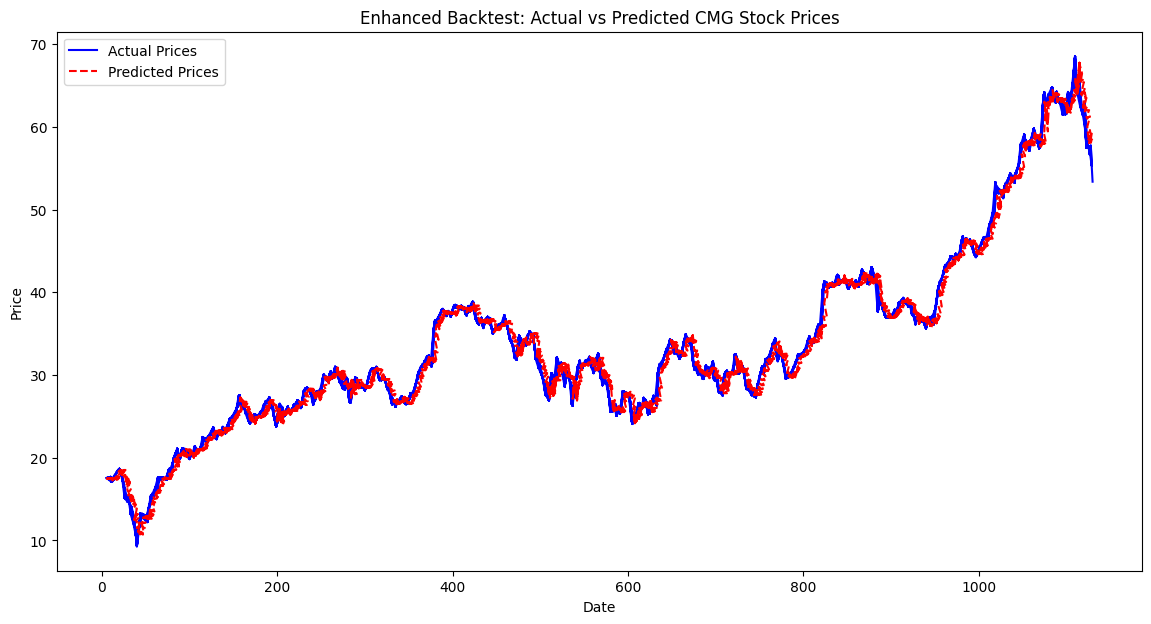

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def enhanced_backtest_model(model, data, target, window_size=5):
    predictions = []
    actuals = []
    dates = []
    
    for i in range(window_size, len(data) - window_size):
        X_train = data.iloc[i - window_size:i]
        y_train = target.iloc[i - window_size:i]
        current_n_neighbors = min(best_n_neighbors, len(X_train))
        model.set_params(n_neighbors=current_n_neighbors)
        model.fit(X_train, y_train)
        X_test = data.iloc[i:i + window_size]
        y_test = target.iloc[i:i + window_size]
        
        prediction = model.predict(X_test)
        predictions.extend(prediction)
        actuals.extend(y_test)
        dates.extend(data.index[i:i + window_size])

    return np.array(predictions), np.array(actuals), np.array(dates)

# Extract features and target
X = price_df[key_features]
y = price_df['Adj Close']

# Perform enhanced backtesting
predictions, actuals, dates = enhanced_backtest_model(model, X, y)

# Calculate metrics
mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f"Enhanced Backtest Mean Squared Error: {mse}")
print(f"Enhanced Backtest Mean Absolute Error: {mae}")
print(f"Enhanced Backtest R^2 Score: {r2}")

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(dates, actuals, label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Enhanced Backtest: Actual vs Predicted CMG Stock Prices')
plt.legend()
plt.show()

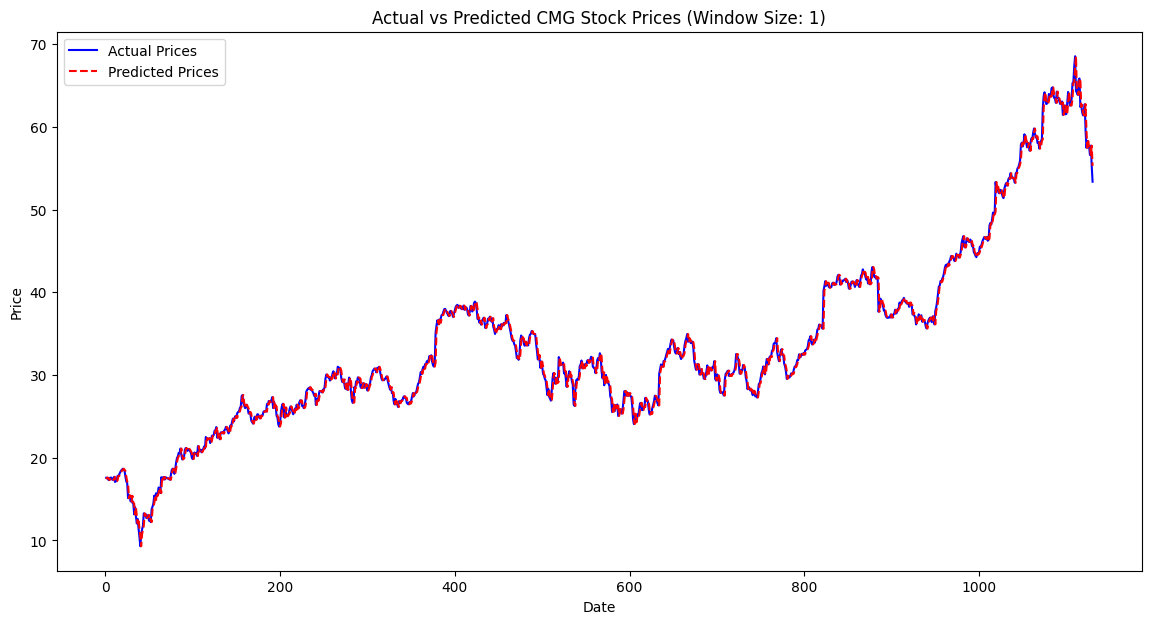

Window Size: 1
Mean Squared Error: 0.4563677385218062
Mean Absolute Error: 0.467248338938053
R^2 Score: 0.9963247750809823



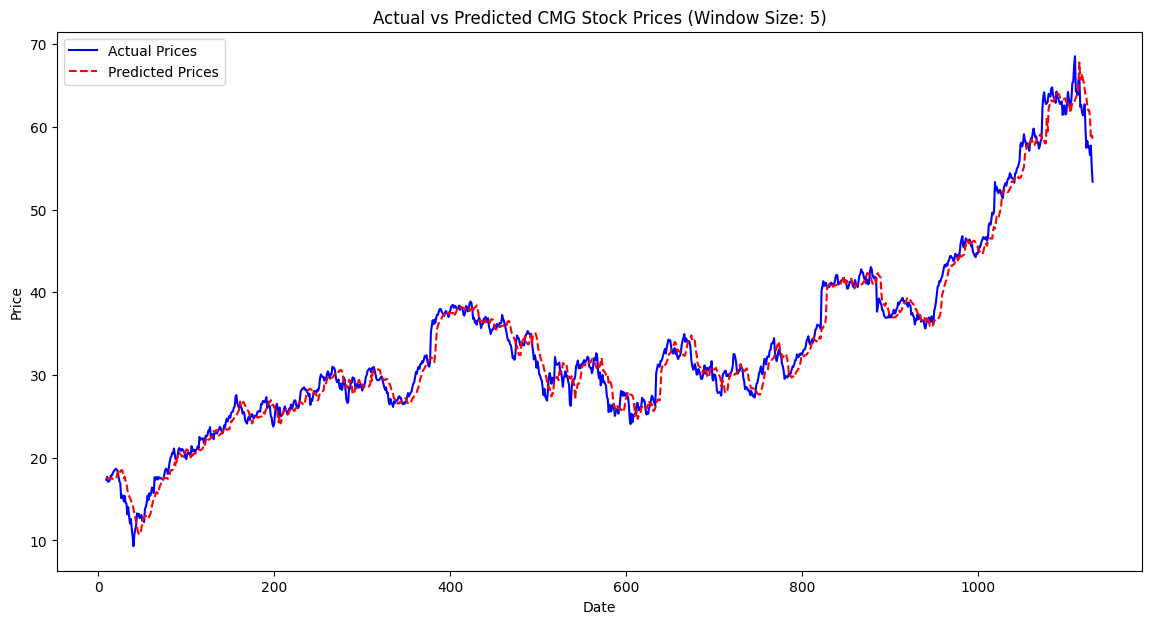

Window Size: 5
Mean Squared Error: 2.6531077934371243
Mean Absolute Error: 1.2334543717968667
R^2 Score: 0.9784625440190858



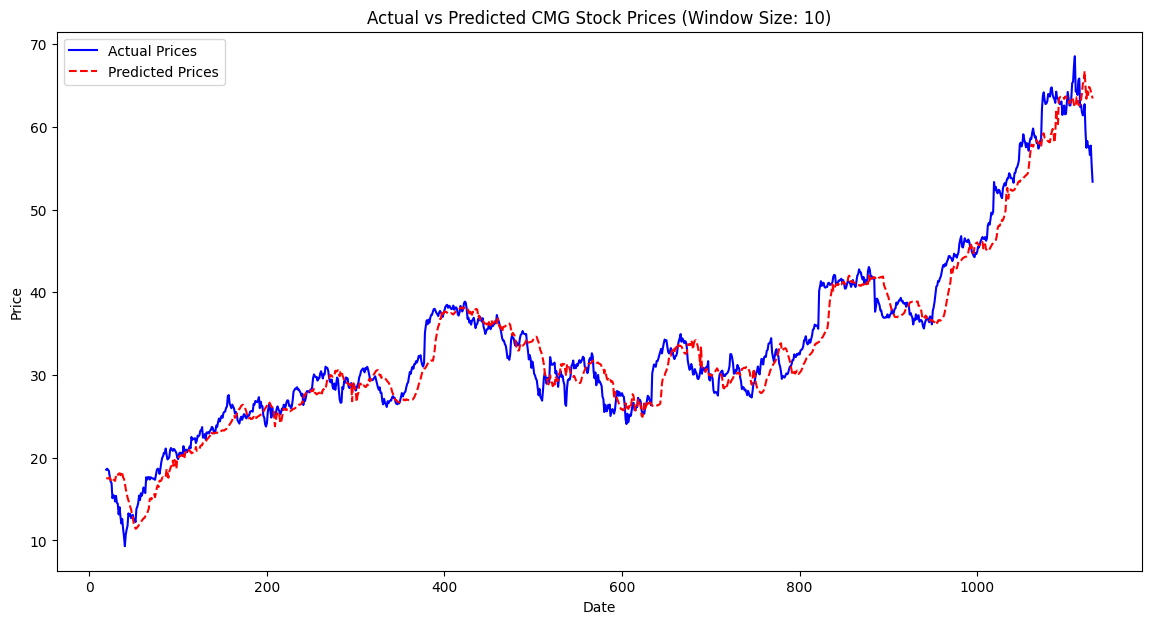

Window Size: 10
Mean Squared Error: 6.151730677388468
Mean Absolute Error: 1.8930057415115367
R^2 Score: 0.9495541933339997



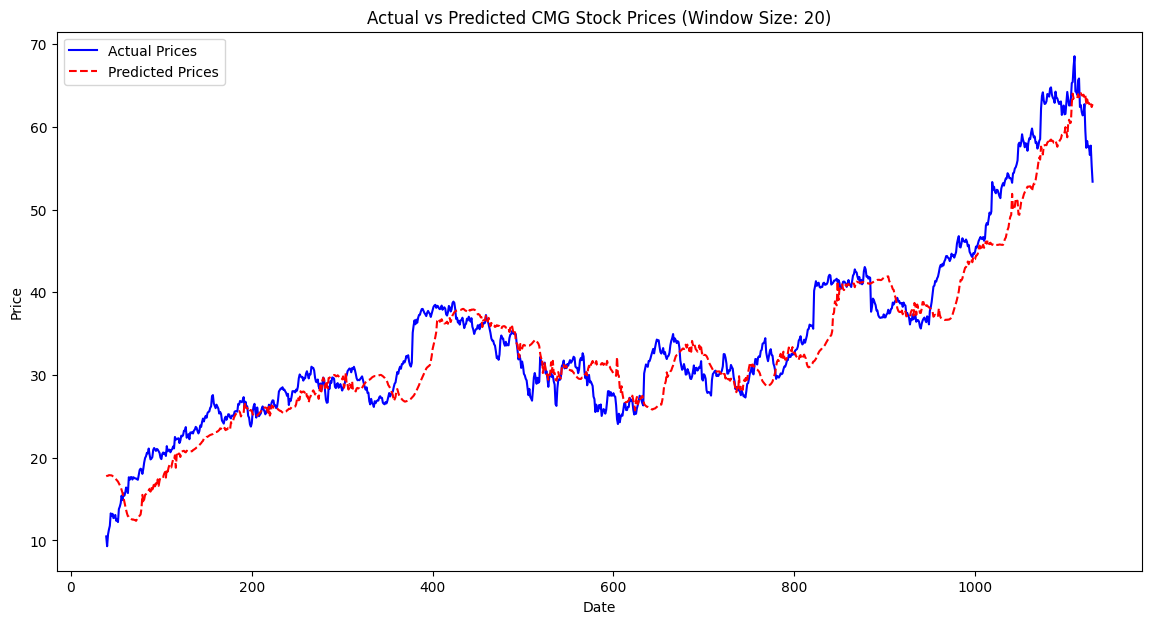

Window Size: 20
Mean Squared Error: 12.45555558300994
Mean Absolute Error: 2.776644607479768
R^2 Score: 0.8941531915526179



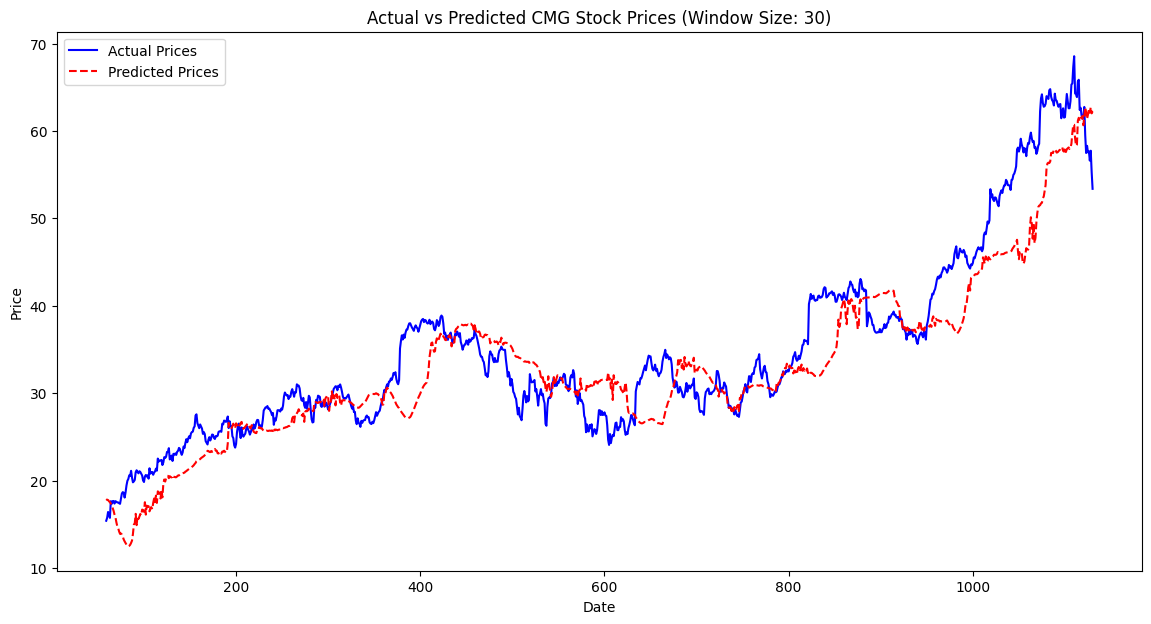

Window Size: 30
Mean Squared Error: 19.127134465986035
Mean Absolute Error: 3.377282152825449
R^2 Score: 0.8278922051492464

Window Size: 1
Mean Squared Error: 0.4563677385218062
Mean Absolute Error: 0.467248338938053
R^2 Score: 0.9963247750809823

Window Size: 5
Mean Squared Error: 2.6531077934371243
Mean Absolute Error: 1.2334543717968667
R^2 Score: 0.9784625440190858

Window Size: 10
Mean Squared Error: 6.151730677388468
Mean Absolute Error: 1.8930057415115367
R^2 Score: 0.9495541933339997

Window Size: 20
Mean Squared Error: 12.45555558300994
Mean Absolute Error: 2.776644607479768
R^2 Score: 0.8941531915526179

Window Size: 30
Mean Squared Error: 19.127134465986035
Mean Absolute Error: 3.377282152825449
R^2 Score: 0.8278922051492464



In [19]:
# Initialize the model with the best parameters
best_n_neighbors = 20
model = KNeighborsRegressor(n_neighbors=best_n_neighbors, metric='euclidean', weights='distance')

# Function to backtest the model
def backtest_model(model, data, target, window_size=5):
    predictions = []
    actuals = []
    dates = []

    for i in range(window_size, len(data) - window_size):
        X_train = data.iloc[i - window_size:i]
        y_train = target.iloc[i - window_size:i]
        current_n_neighbors = min(best_n_neighbors, len(X_train))  # Adjust n_neighbors
        model.set_params(n_neighbors=current_n_neighbors)
        model.fit(X_train, y_train)
        X_test = data.iloc[i:i + window_size]
        if len(X_test) == 0:  # Ensure X_test is not empty
            continue
        prediction = model.predict(X_test)
        predictions.append(prediction[-1])
        actuals.append(target.iloc[i + window_size - 1])
        dates.append(data.index[i + window_size - 1])

    return np.array(predictions), np.array(actuals), np.array(dates)

# Test different window sizes
window_sizes = [1, 5, 10, 20, 30]

# Store results for comparison
results = {}

for window_size in window_sizes:
    predictions, actuals, dates = backtest_model(model, X, y, window_size)
    
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    
    results[window_size] = {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'predictions': predictions,
        'actuals': actuals,
        'dates': dates
    }
    
    # Plot results
    plt.figure(figsize=(14, 7))
    plt.plot(dates, actuals, label='Actual Prices', color='blue')
    plt.plot(dates, predictions, label='Predicted Prices', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted CMG Stock Prices (Window Size: {window_size})')
    plt.legend()
    plt.show()

    print(f"Window Size: {window_size}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")
    print()

# Display results for comparison
for window_size, metrics in results.items():
    print(f"Window Size: {window_size}")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"Mean Absolute Error: {metrics['mae']}")
    print(f"R^2 Score: {metrics['r2']}")
    print()

/tmp/ipykernel_18/2845989032.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'}
Mean Squared Error: 2.9579359063809427
Mean Absolute Error: 1.3264226766488414
R^2 Score: 0.9759880037533217


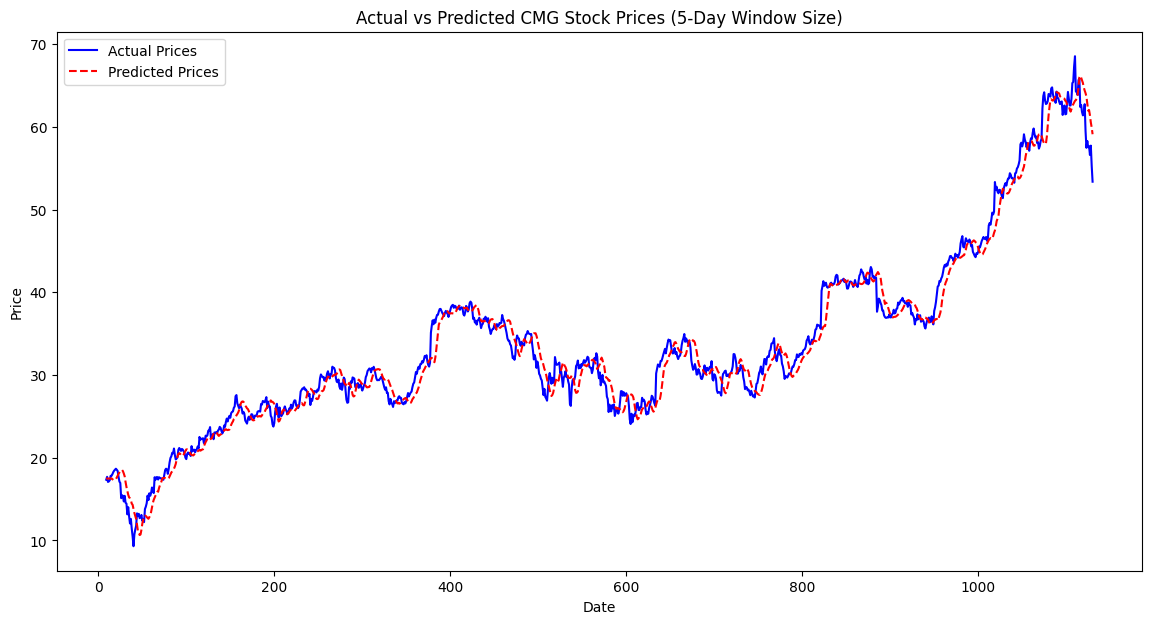

In [20]:
from sklearn.model_selection import GridSearchCV

# Verify and select key features
key_features = ['Stoch_Osc', 'Stoch_Osc*ADX', 'ADI']
assert all(feature in cmg_stock_data.columns for feature in key_features), "Some key features are missing."

# Extract relevant features and target
price_df = cmg_stock_data[['Date', 'Adj Close'] + key_features].copy()

# Define features (X) and target (y)
X = price_df[key_features]
y = price_df['Adj Close']

# Ensure there are no NaN values in X and y
X.dropna(inplace=True)
y.dropna(inplace=True)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Initialize the model with the best parameters
model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'], weights=best_params['weights'])

# Function to backtest the model
def backtest_model(model, data, target, window_size=5):
    predictions = []
    actuals = []
    dates = []

    for i in range(window_size, len(data) - window_size):
        X_train = data.iloc[i - window_size:i]
        y_train = target.iloc[i - window_size:i]
        current_n_neighbors = min(best_params['n_neighbors'], len(X_train))  # Adjust n_neighbors
        model.set_params(n_neighbors=current_n_neighbors)
        model.fit(X_train, y_train)
        X_test = data.iloc[i:i + window_size]
        if len(X_test) == 0:  # Ensure X_test is not empty
            continue
        prediction = model.predict(X_test)
        predictions.append(prediction[-1])
        actuals.append(target.iloc[i + window_size - 1])
        dates.append(data.index[i + window_size - 1])

    return np.array(predictions), np.array(actuals), np.array(dates)

# Backtest the model with the 5-day window size
predictions, actuals, dates = backtest_model(model, X, y, window_size=5)

# Calculate metrics
mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(dates, actuals, label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted CMG Stock Prices (5-Day Window Size)')
plt.legend()
plt.show()

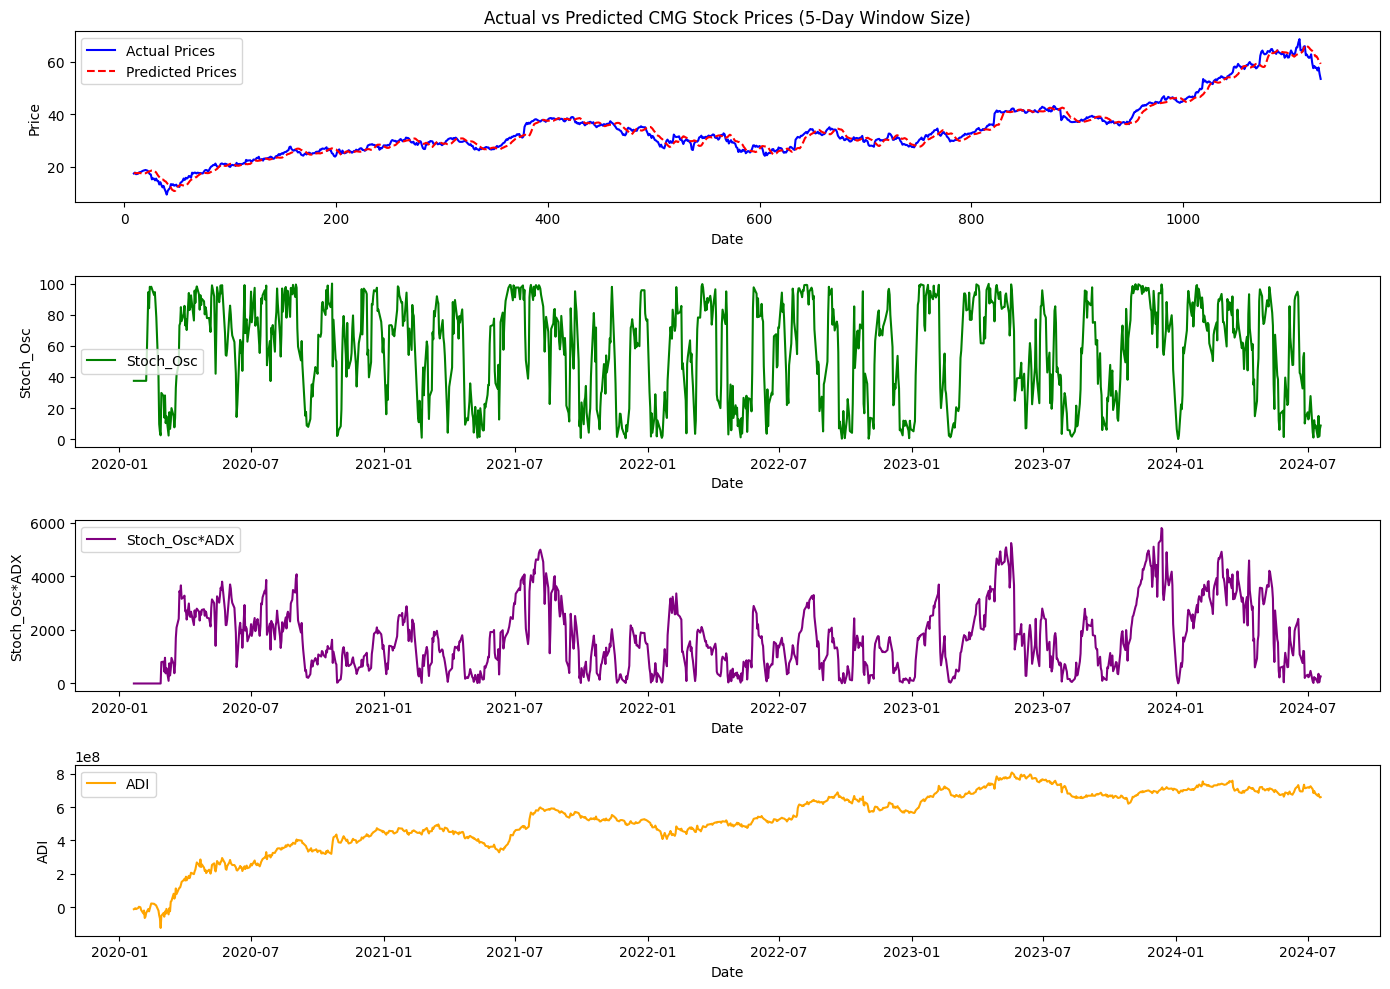

In [21]:
# Plot results
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(dates, actuals, label='Actual Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted CMG Stock Prices (5-Day Window Size)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(cmg_stock_data['Date'], cmg_stock_data['Stoch_Osc'], label='Stoch_Osc', color='green')
plt.xlabel('Date')
plt.ylabel('Stoch_Osc')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(cmg_stock_data['Date'], cmg_stock_data['Stoch_Osc*ADX'], label='Stoch_Osc*ADX', color='purple')
plt.xlabel('Date')
plt.ylabel('Stoch_Osc*ADX')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(cmg_stock_data['Date'], cmg_stock_data['ADI'], label='ADI', color='orange')
plt.xlabel('Date')
plt.ylabel('ADI')
plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_18/665274843.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cmg_stock_data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_18/665274843.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cmg_stock_data.fillna(method='bfill', inplace=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Latest Monday Date: 2024-07-15 00:00:00
Latest CMG Stock Price: 56.610001
Predicted CMG Stock Price for next Friday: 53.722401
Prediction Interval: [53.722401, 53.722401]
Model Accuracy (R^2 score): 1.0


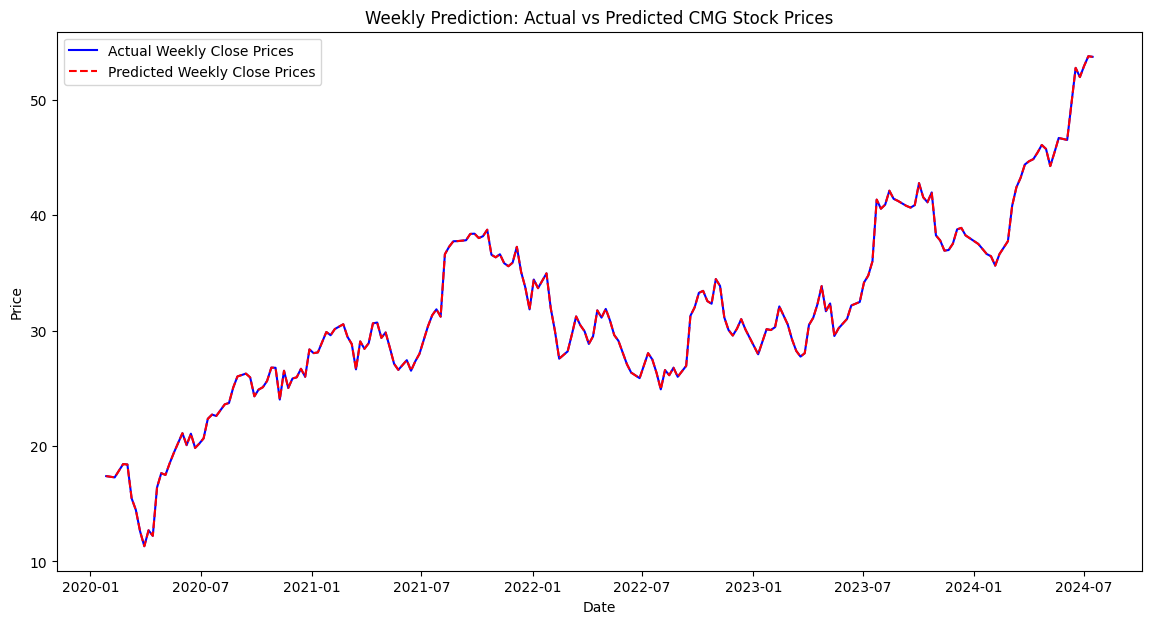

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_predict

# Add more technical indicators, including volatility (ATR)
cmg_stock_data['RSI'] = ta.momentum.rsi(cmg_stock_data['Adj Close'], window=14)
cmg_stock_data['MACD'] = ta.trend.macd_diff(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_High'] = ta.volatility.bollinger_hband(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_Low'] = ta.volatility.bollinger_lband(cmg_stock_data['Adj Close'])
cmg_stock_data['EMA_12'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=12)
cmg_stock_data['EMA_26'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=26)
cmg_stock_data['ATR'] = ta.volatility.average_true_range(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], window=14)

# Handle NaN values by filling them with appropriate imputation strategies
cmg_stock_data.fillna(method='ffill', inplace=True)
cmg_stock_data.fillna(method='bfill', inplace=True)

# Define key features including volatility
key_features = ['Stoch_Osc','ADI', 'Stoch_Osc*ADX', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low', 'EMA_12', 'EMA_26', 'ATR']

# Extract relevant features and target
price_df = cmg_stock_data[['Date', 'Adj Close'] + key_features].dropna().reset_index(drop=True)

# Filter Mondays and corresponding Fridays
price_df['Day_of_Week'] = price_df['Date'].dt.dayofweek
mondays = price_df[price_df['Day_of_Week'] == 0].reset_index(drop=True)
fridays = price_df[price_df['Day_of_Week'] == 4].reset_index(drop=True)

# Ensure both have the same length
min_length = min(len(mondays), len(fridays))
mondays = mondays.iloc[:min_length]
fridays = fridays.iloc[:min_length]

# Calculate weekly percentage change
weekly_pct_change = (fridays['Adj Close'].values - mondays['Adj Close'].values) / mondays['Adj Close'].values
weekly_data = mondays[key_features].copy()
weekly_data['Weekly % Change'] = weekly_pct_change

# Train model on weekly data
X_weekly = weekly_data[key_features]
y_weekly = weekly_data['Weekly % Change']

# Standardize the features
scaler = StandardScaler()
X_weekly_scaled = scaler.fit_transform(X_weekly)

# Use the best-performing model (KNN with identified best parameters)
model = KNeighborsRegressor(n_neighbors=20, metric='euclidean', weights='distance')
model.fit(X_weekly_scaled, y_weekly)

# Predict next week's percentage change
latest_monday = cmg_stock_data[cmg_stock_data['Date'].dt.dayofweek == 0].iloc[-1]  # Get the latest Monday data
next_monday_data = latest_monday[key_features].values.reshape(1, -1)
next_monday_scaled = scaler.transform(next_monday_data)
next_friday_pct_change = model.predict(next_monday_scaled)

# Calculate predicted Friday price
next_monday_close_price = latest_monday['Adj Close']
next_friday_predicted_price = next_monday_close_price * (1 + next_friday_pct_change[0])

# Calculate residuals and standard deviation of residuals
y_pred = model.predict(X_weekly_scaled)
residuals = y_weekly - y_pred
residual_std = np.std(residuals)

# Calculate prediction interval
prediction_interval = 1.96 * residual_std  # 95% confidence interval
lower_bound = next_friday_predicted_price * (1 - prediction_interval)
upper_bound = next_friday_predicted_price * (1 + prediction_interval)

# Calculate model accuracy (R^2 score)
r2 = r2_score(y_weekly, y_pred)

# Print the latest stock price, predicted price, and model accuracy
print(f"Latest Monday Date: {latest_monday['Date']}")
print(f"Latest CMG Stock Price: {next_monday_close_price}")
print(f"Predicted CMG Stock Price for next Friday: {next_friday_predicted_price}")
print(f"Prediction Interval: [{lower_bound}, {upper_bound}]")
print(f"Model Accuracy (R^2 score): {r2}")

# Plot the actual vs predicted prices for historical data
y_pred_prices = mondays['Adj Close'].values * (1 + y_pred)
plt.figure(figsize=(14, 7))
plt.plot(mondays['Date'], fridays['Adj Close'].values, label='Actual Weekly Close Prices', color='blue')
plt.plot(mondays['Date'], y_pred_prices, label='Predicted Weekly Close Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Prediction: Actual vs Predicted CMG Stock Prices')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

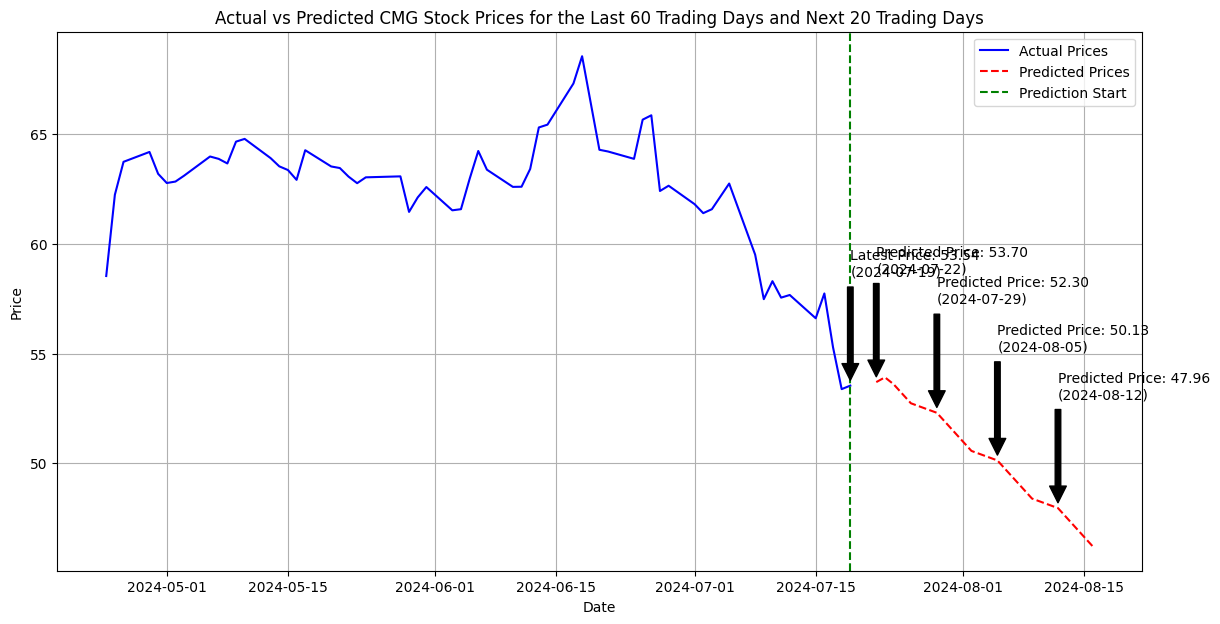

In [23]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ta

# Load the most recent CMG stock data
file_path = '/kaggle/input/cmg-july-prices/CMG - jULY 19 2024.csv'
cmg_stock_data = pd.read_csv(file_path)
cmg_stock_data['Date'] = pd.to_datetime(cmg_stock_data['Date'])
cmg_stock_data = cmg_stock_data.sort_values(by='Date')

# Calculate the required features if they are missing
if 'Stoch_Osc' not in cmg_stock_data.columns:
    cmg_stock_data['Stoch_Osc'] = ta.momentum.stoch(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
if 'Stoch_Osc*ADX' not in cmg_stock_data.columns:
    cmg_stock_data['ADX'] = ta.trend.adx(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
    cmg_stock_data['Stoch_Osc*ADX'] = cmg_stock_data['Stoch_Osc'] * cmg_stock_data['ADX']
if 'ADI' not in cmg_stock_data.columns:
    cmg_stock_data['ADI'] = ta.volume.acc_dist_index(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])

# Add more technical indicators, including volatility (ATR)
cmg_stock_data['RSI'] = ta.momentum.rsi(cmg_stock_data['Adj Close'], window=14)
cmg_stock_data['MACD'] = ta.trend.macd_diff(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_High'] = ta.volatility.bollinger_hband(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_Low'] = ta.volatility.bollinger_lband(cmg_stock_data['Adj Close'])
cmg_stock_data['EMA_12'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=12)
cmg_stock_data['EMA_26'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=26)
cmg_stock_data['ATR'] = ta.volatility.average_true_range(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], window=14)

# Handle NaN values by filling them with appropriate imputation strategies
cmg_stock_data.ffill(inplace=True)
cmg_stock_data.bfill(inplace=True)

# Define key features including volatility
key_features = ['Stoch_Osc','ADI', 'Stoch_Osc*ADX', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low', 'EMA_12', 'EMA_26', 'ATR']

# Prepare data with daily figures
cmg_stock_data['Adj Close % Change'] = cmg_stock_data['Adj Close'].pct_change()
cmg_stock_data['Adj Close $ Change'] = cmg_stock_data['Adj Close'].diff()
cmg_stock_data = cmg_stock_data.dropna().reset_index(drop=True)

# Define features (X) and target (y)
X = cmg_stock_data[key_features].iloc[1:]  # Skip the first row to match the target length
y_price_change = cmg_stock_data['Adj Close $ Change'][1:]  # Skip the first NaN value
y_pct_change = cmg_stock_data['Adj Close % Change'][1:]  # Skip the first NaN value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the best-performing model (KNN with identified best parameters)
model_price_change = KNeighborsRegressor(n_neighbors=20, metric='euclidean', weights='distance')
model_price_change.fit(X_scaled, y_price_change)

model_pct_change = KNeighborsRegressor(n_neighbors=20, metric='euclidean', weights='distance')
model_pct_change.fit(X_scaled, y_pct_change)

# Predict the next 20 trading days
last_known_data = X_scaled[-1].reshape(1, -1)
predicted_price_changes = []
predicted_pct_changes = []
last_known_price = cmg_stock_data.iloc[-1]['Adj Close']

for i in range(20):
    predicted_price_change = model_price_change.predict(last_known_data)[0]
    predicted_pct_change = model_pct_change.predict(last_known_data)[0]
    
    predicted_price_changes.append(predicted_price_change)
    predicted_pct_changes.append(predicted_pct_change)
    
    # Update the last known data for the next prediction
    last_known_price += predicted_price_change
    new_data = np.append(last_known_data[0][1:], predicted_pct_change).reshape(1, -1)
    last_known_data = scaler.transform(new_data)

# Calculate predicted prices
predicted_prices = cmg_stock_data['Adj Close'].tolist()
for change in predicted_price_changes:
    predicted_prices.append(predicted_prices[-1] + change)

# Create a DataFrame for plotting
predicted_dates = pd.date_range(start=cmg_stock_data['Date'].iloc[-1], periods=21, freq='B')[1:]
predicted_df = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted Price': predicted_prices[-20:]
})

# Filter the last 60 trading days and the predicted 20 trading days
plot_start_date = cmg_stock_data['Date'].iloc[-60]
actual_df = cmg_stock_data[cmg_stock_data['Date'] >= plot_start_date]

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_df['Date'], actual_df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Prices', color='red', linestyle='--')
plt.axvline(x=cmg_stock_data['Date'].iloc[-1], color='green', linestyle='--', label='Prediction Start')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted CMG Stock Prices for the Last 60 Trading Days and Next 20 Trading Days')
plt.legend()

# Annotate the latest stock price
latest_stock_price = actual_df.iloc[-1]['Adj Close']
latest_stock_date = actual_df.iloc[-1]['Date']
plt.annotate(f'Latest Price: {latest_stock_price:.2f}\n({latest_stock_date.date()})',
             xy=(latest_stock_date, latest_stock_price), xytext=(latest_stock_date, latest_stock_price + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate key dates and predicted prices
for i in range(0, 20, 5):  # Annotate every 5 days in the prediction period
    predicted_price = predicted_df.iloc[i]['Predicted Price']
    predicted_date = predicted_df.iloc[i]['Date']
    plt.annotate(f'Predicted Price: {predicted_price:.2f}\n({predicted_date.date()})',
                 xy=(predicted_date, predicted_price), xytext=(predicted_date, predicted_price + 5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True)
plt.show()

Price Change - Mean Squared Error: 0.37012441255858813
Price Change - Mean Absolute Error: 0.4186519950560433
Price Change - R^2 Score: 0.1878884534590609
Percentage Change - Mean Squared Error: 0.0004284838900933317
Percentage Change - Mean Absolute Error: 0.013702979608327049
Percentage Change - R^2 Score: 0.18701775714295443


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

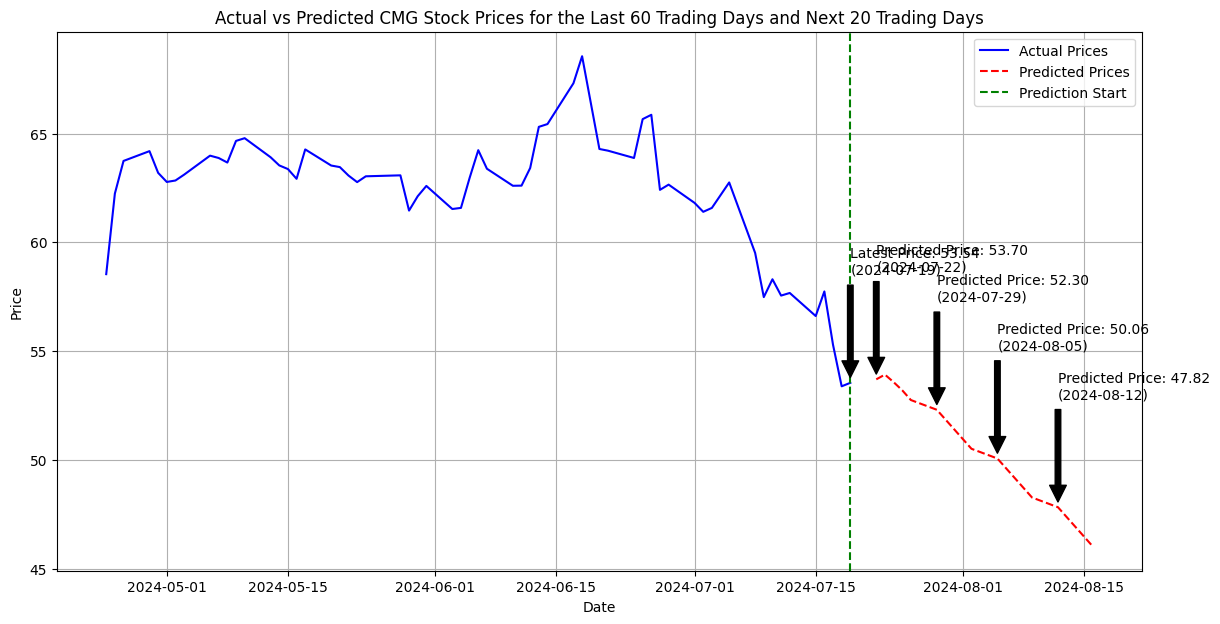

In [24]:
# Define key features including volatility
key_features = ['Stoch_Osc', 'Stoch_Osc*ADX', 'ADI', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low', 'EMA_12', 'EMA_26', 'ATR']

# Prepare data with daily figures
cmg_stock_data['Adj Close % Change'] = cmg_stock_data['Adj Close'].pct_change()
cmg_stock_data['Adj Close $ Change'] = cmg_stock_data['Adj Close'].diff()
cmg_stock_data = cmg_stock_data.dropna().reset_index(drop=True)

# Define features (X) and target (y)
X = cmg_stock_data[key_features].iloc[1:]  # Skip the first row to match the target length
y_price_change = cmg_stock_data['Adj Close $ Change'][1:]  # Skip the first NaN value
y_pct_change = cmg_stock_data['Adj Close % Change'][1:]  # Skip the first NaN value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validate the model using cross-validation
cv_predictions_price_change = cross_val_predict(KNeighborsRegressor(n_neighbors=20, metric='euclidean', weights='distance'), X_scaled, y_price_change, cv=5)
cv_predictions_pct_change = cross_val_predict(KNeighborsRegressor(n_neighbors=20, metric='euclidean', weights='distance'), X_scaled, y_pct_change, cv=5)

# Calculate metrics
mse_price_change = mean_squared_error(y_price_change, cv_predictions_price_change)
mae_price_change = mean_absolute_error(y_price_change, cv_predictions_price_change)
r2_price_change = r2_score(y_price_change, cv_predictions_price_change)

mse_pct_change = mean_squared_error(y_pct_change, cv_predictions_pct_change)
mae_pct_change = mean_absolute_error(y_pct_change, cv_predictions_pct_change)
r2_pct_change = r2_score(y_pct_change, cv_predictions_pct_change)

print(f"Price Change - Mean Squared Error: {mse_price_change}")
print(f"Price Change - Mean Absolute Error: {mae_price_change}")
print(f"Price Change - R^2 Score: {r2_price_change}")

print(f"Percentage Change - Mean Squared Error: {mse_pct_change}")
print(f"Percentage Change - Mean Absolute Error: {mae_pct_change}")
print(f"Percentage Change - R^2 Score: {r2_pct_change}")

# Use the best-performing model (KNN with identified best parameters) for prediction
model_price_change = KNeighborsRegressor(n_neighbors=20, metric='euclidean', weights='distance')
model_price_change.fit(X_scaled, y_price_change)

model_pct_change = KNeighborsRegressor(n_neighbors=20, metric='euclidean', weights='distance')
model_pct_change.fit(X_scaled, y_pct_change)

# Predict the next 20 trading days
last_known_data = X_scaled[-1].reshape(1, -1)
predicted_price_changes = []
predicted_pct_changes = []
last_known_price = cmg_stock_data.iloc[-1]['Adj Close']

for i in range(20):
    predicted_price_change = model_price_change.predict(last_known_data)[0]
    predicted_pct_change = model_pct_change.predict(last_known_data)[0]
    
    predicted_price_changes.append(predicted_price_change)
    predicted_pct_changes.append(predicted_pct_change)
    
    # Update the last known data for the next prediction
    last_known_price += predicted_price_change
    new_data = np.append(last_known_data[0][1:], predicted_pct_change).reshape(1, -1)
    last_known_data = scaler.transform(new_data)

# Calculate predicted prices
predicted_prices = cmg_stock_data['Adj Close'].tolist()
for change in predicted_price_changes:
    predicted_prices.append(predicted_prices[-1] + change)

# Create a DataFrame for plotting
predicted_dates = pd.date_range(start=cmg_stock_data['Date'].iloc[-1], periods=21, freq='B')[1:]
predicted_df = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted Price': predicted_prices[-20:]
})

# Filter the last 60 trading days and the predicted 20 trading days
plot_start_date = cmg_stock_data['Date'].iloc[-60]
actual_df = cmg_stock_data[cmg_stock_data['Date'] >= plot_start_date]

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_df['Date'], actual_df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Prices', color='red', linestyle='--')
plt.axvline(x=cmg_stock_data['Date'].iloc[-1], color='green', linestyle='--', label='Prediction Start')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted CMG Stock Prices for the Last 60 Trading Days and Next 20 Trading Days')
plt.legend()

# Annotate the latest stock price
latest_stock_price = actual_df.iloc[-1]['Adj Close']
latest_stock_date = actual_df.iloc[-1]['Date']
plt.annotate(f'Latest Price: {latest_stock_price:.2f}\n({latest_stock_date.date()})',
             xy=(latest_stock_date, latest_stock_price), xytext=(latest_stock_date, latest_stock_price + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate key dates and predicted prices
for i in range(0, 20, 5):  # Annotate every 5 days in the prediction period
    predicted_price = predicted_df.iloc[i]['Predicted Price']
    predicted_date = predicted_df.iloc[i]['Date']
    plt.annotate(f'Predicted Price: {predicted_price:.2f}\n({predicted_date.date()})',
                 xy=(predicted_date, predicted_price), xytext=(predicted_date, predicted_price + 5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN model
knn = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search_price = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search_pct = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search_price.fit(X_scaled, y_price_change)
grid_search_pct.fit(X_scaled, y_pct_change)

# Get the best model
best_model_price_change = grid_search_price.best_estimator_
best_model_pct_change = grid_search_pct.best_estimator_

print("Best Parameters for Price Change:", grid_search_price.best_params_)
print("Best Parameters for Percentage Change:", grid_search_pct.best_params_)


Best Parameters for Price Change: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Parameters for Percentage Change: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}


In [26]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(X_scaled)

# Select all rows that are not outliers
mask = yhat != -1
X_no_outliers = X_scaled[mask]
y_price_change_no_outliers = y_price_change[mask]
y_pct_change_no_outliers = y_pct_change[mask]

# Fit models on data without outliers
best_model_price_change.fit(X_no_outliers, y_price_change_no_outliers)
best_model_pct_change.fit(X_no_outliers, y_pct_change_no_outliers)

# Validate the models again
cv_predictions_no_outliers_price = cross_val_predict(best_model_price_change, X_no_outliers, y_price_change_no_outliers, cv=5)
cv_predictions_no_outliers_pct = cross_val_predict(best_model_pct_change, X_no_outliers, y_pct_change_no_outliers, cv=5)

# Calculate metrics
mse_no_outliers_price = mean_squared_error(y_price_change_no_outliers, cv_predictions_no_outliers_price)
mae_no_outliers_price = mean_absolute_error(y_price_change_no_outliers, cv_predictions_no_outliers_price)
r2_no_outliers_price = r2_score(y_price_change_no_outliers, cv_predictions_no_outliers_price)

mse_no_outliers_pct = mean_squared_error(y_pct_change_no_outliers, cv_predictions_no_outliers_pct)
mae_no_outliers_pct = mean_absolute_error(y_pct_change_no_outliers, cv_predictions_no_outliers_pct)
r2_no_outliers_pct = r2_score(y_pct_change_no_outliers, cv_predictions_no_outliers_pct)

print(f"Without Outliers - Price Change - Mean Squared Error: {mse_no_outliers_price}")
print(f"Without Outliers - Price Change - Mean Absolute Error: {mae_no_outliers_price}")
print(f"Without Outliers - Price Change - R^2 Score: {r2_no_outliers_price}")

print(f"Without Outliers - Percentage Change - Mean Squared Error: {mse_no_outliers_pct}")
print(f"Without Outliers - Percentage Change - Mean Absolute Error: {mae_no_outliers_pct}")
print(f"Without Outliers - Percentage Change - R^2 Score: {r2_no_outliers_pct}")


Without Outliers - Price Change - Mean Squared Error: 0.34844383299579523
Without Outliers - Price Change - Mean Absolute Error: 0.4085729228910161
Without Outliers - Price Change - R^2 Score: 0.19866388649141653
Without Outliers - Percentage Change - Mean Squared Error: 0.0004244408368206318
Without Outliers - Percentage Change - Mean Absolute Error: 0.013591686291698251
Without Outliers - Percentage Change - R^2 Score: 0.19179138505051108


Price Change - Mean Squared Error: 0.3661637505399037
Price Change - Mean Absolute Error: 0.41934086953741595
Price Change - R^2 Score: 0.19720456915928697
Percentage Change - Mean Squared Error: 0.00042542839542622957
Percentage Change - Mean Absolute Error: 0.013648107465839693
Percentage Change - R^2 Score: 0.1933090986477376


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

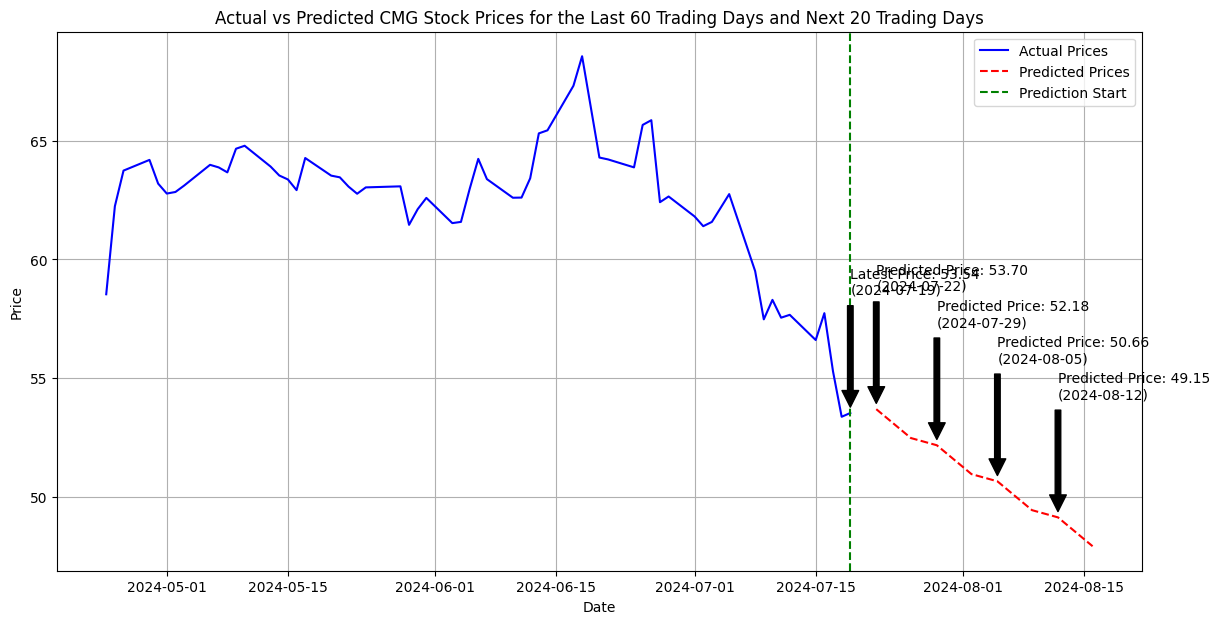

In [27]:
# Define key features including new ones
key_features = ['Stoch_Osc', 'Stoch_Osc*ADX', 'ADI', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low', 'EMA_12', 'EMA_26', 'ATR']

# Prepare data with daily figures
cmg_stock_data['Adj Close % Change'] = cmg_stock_data['Adj Close'].pct_change()
cmg_stock_data['Adj Close $ Change'] = cmg_stock_data['Adj Close'].diff()
cmg_stock_data = cmg_stock_data.dropna().reset_index(drop=True)

# Define features (X) and target (y)
X = cmg_stock_data[key_features].iloc[1:]  # Skip the first row to match the target length
y_price_change = cmg_stock_data['Adj Close $ Change'][1:]  # Skip the first NaN value
y_pct_change = cmg_stock_data['Adj Close % Change'][1:]  # Skip the first NaN value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the best-performing model (KNN with identified best parameters) for validation
best_model_price_change = KNeighborsRegressor(n_neighbors=10, metric='manhattan', weights='distance')
best_model_pct_change = KNeighborsRegressor(n_neighbors=30, metric='manhattan', weights='distance')

# Validate the model using cross-validation
cv_predictions_price_change = cross_val_predict(best_model_price_change, X_scaled, y_price_change, cv=5)
cv_predictions_pct_change = cross_val_predict(best_model_pct_change, X_scaled, y_pct_change, cv=5)

# Calculate metrics
mse_price_change = mean_squared_error(y_price_change, cv_predictions_price_change)
mae_price_change = mean_absolute_error(y_price_change, cv_predictions_price_change)
r2_price_change = r2_score(y_price_change, cv_predictions_price_change)

mse_pct_change = mean_squared_error(y_pct_change, cv_predictions_pct_change)
mae_pct_change = mean_absolute_error(y_pct_change, cv_predictions_pct_change)
r2_pct_change = r2_score(y_pct_change, cv_predictions_pct_change)

print(f"Price Change - Mean Squared Error: {mse_price_change}")
print(f"Price Change - Mean Absolute Error: {mae_price_change}")
print(f"Price Change - R^2 Score: {r2_price_change}")

print(f"Percentage Change - Mean Squared Error: {mse_pct_change}")
print(f"Percentage Change - Mean Absolute Error: {mae_pct_change}")
print(f"Percentage Change - R^2 Score: {r2_pct_change}")

# Fit the best models
best_model_price_change.fit(X_scaled, y_price_change)
best_model_pct_change.fit(X_scaled, y_pct_change)

# Predict the next 20 trading days
last_known_data = X_scaled[-1].reshape(1, -1)
predicted_price_changes = []
predicted_pct_changes = []
last_known_price = cmg_stock_data.iloc[-1]['Adj Close']

for i in range(20):
    predicted_price_change = best_model_price_change.predict(last_known_data)[0]
    predicted_pct_change = best_model_pct_change.predict(last_known_data)[0]
    
    predicted_price_changes.append(predicted_price_change)
    predicted_pct_changes.append(predicted_pct_change)
    
    # Update the last known data for the next prediction
    last_known_price += predicted_price_change
    new_data = np.append(last_known_data[0][1:], predicted_pct_change).reshape(1, -1)
    last_known_data = scaler.transform(new_data)

# Calculate predicted prices
predicted_prices = cmg_stock_data['Adj Close'].tolist()
for change in predicted_price_changes:
    predicted_prices.append(predicted_prices[-1] + change)

# Create a DataFrame for plotting
predicted_dates = pd.date_range(start=cmg_stock_data['Date'].iloc[-1], periods=21, freq='B')[1:]
predicted_df = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted Price': predicted_prices[-20:]
})

# Filter the last 60 trading days and the predicted 20 trading days
plot_start_date = cmg_stock_data['Date'].iloc[-60]
actual_df = cmg_stock_data[cmg_stock_data['Date'] >= plot_start_date]

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_df['Date'], actual_df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Prices', color='red', linestyle='--')
plt.axvline(x=cmg_stock_data['Date'].iloc[-1], color='green', linestyle='--', label='Prediction Start')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted CMG Stock Prices for the Last 60 Trading Days and Next 20 Trading Days')
plt.legend()

# Annotate the latest stock price
latest_stock_price = actual_df.iloc[-1]['Adj Close']
latest_stock_date = actual_df.iloc[-1]['Date']
plt.annotate(f'Latest Price: {latest_stock_price:.2f}\n({latest_stock_date.date()})',
             xy=(latest_stock_date, latest_stock_price), xytext=(latest_stock_date, latest_stock_price + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate key dates and predicted prices
for i in range(0, 20, 5):  # Annotate every 5 days in the prediction period
    predicted_price = predicted_df.iloc[i]['Predicted Price']
    predicted_date = predicted_df.iloc[i]['Date']
    plt.annotate(f'Predicted Price: {predicted_price:.2f}\n({predicted_date.date()})',
                 xy=(predicted_date, predicted_price), xytext=(predicted_date, predicted_price + 5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True)
plt.show() 

In [28]:
# import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
import ta
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the most recent CMG stock data

cmg_stock_data['Date'] = pd.to_datetime(cmg_stock_data['Date'])
cmg_stock_data = cmg_stock_data.sort_values(by='Date')

# Calculate the required features if they are missing
cmg_stock_data['Stoch_Osc'] = ta.momentum.stoch(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
cmg_stock_data['ADX'] = ta.trend.adx(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
cmg_stock_data['Stoch_Osc*ADX'] = cmg_stock_data['Stoch_Osc'] * cmg_stock_data['ADX']
cmg_stock_data['ADI'] = ta.volume.acc_dist_index(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])
cmg_stock_data['RSI'] = ta.momentum.rsi(cmg_stock_data['Adj Close'], window=14)
cmg_stock_data['MACD'] = ta.trend.macd_diff(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_High'] = ta.volatility.bollinger_hband(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_Low'] = ta.volatility.bollinger_lband(cmg_stock_data['Adj Close'])
cmg_stock_data['EMA_12'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=12)
cmg_stock_data['EMA_26'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=26)
cmg_stock_data['ATR'] = ta.volatility.average_true_range(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], window=14)
cmg_stock_data['SMA_50'] = ta.trend.sma_indicator(cmg_stock_data['Adj Close'], window=50)
cmg_stock_data['SMA_200'] = ta.trend.sma_indicator(cmg_stock_data['Adj Close'], window=200)

# Lagged moving averages
cmg_stock_data['Lag_MA_5'] = cmg_stock_data['Adj Close'].shift(5).rolling(window=5).mean()
cmg_stock_data['Lag_MA_10'] = cmg_stock_data['Adj Close'].shift(10).rolling(window=10).mean()
cmg_stock_data['Lag_MA_15'] = cmg_stock_data['Adj Close'].shift(15).rolling(window=15).mean()
cmg_stock_data['Lag_MA_20'] = cmg_stock_data['Adj Close'].shift(20).rolling(window=20).mean()

# Fourier Transform
cmg_stock_data['Fourier'] = np.fft.fft(cmg_stock_data['Adj Close']).real

# Time Series Decomposition
result = seasonal_decompose(cmg_stock_data['Adj Close'], model='multiplicative', period=30)
cmg_stock_data['Trend'] = result.trend
cmg_stock_data['Seasonal'] = result.seasonal
cmg_stock_data['Residual'] = result.resid

# Interaction features
cmg_stock_data['RSI*Adj_Close'] = cmg_stock_data['RSI'] * cmg_stock_data['Adj Close']
cmg_stock_data['EMA_12*Volume'] = cmg_stock_data['EMA_12'] * cmg_stock_data['Volume']
cmg_stock_data['Stoch_Osc*ADX'] = cmg_stock_data['Stoch_Osc'] * cmg_stock_data['ADX']

# Seasonality features
cmg_stock_data['Day_of_Week'] = cmg_stock_data['Date'].dt.dayofweek
cmg_stock_data['Day_of_Month'] = cmg_stock_data['Date'].dt.day
cmg_stock_data['Month'] = cmg_stock_data['Date'].dt.month
cmg_stock_data['Quarter'] = cmg_stock_data['Date'].dt.quarter
cmg_stock_data['is_month_end'] = cmg_stock_data['Date'].dt.is_month_end.astype(int)
cmg_stock_data['is_quarter_end'] = cmg_stock_data['Date'].dt.is_quarter_end.astype(int)
cmg_stock_data['is_year_end'] = cmg_stock_data['Date'].dt.is_year_end.astype(int)

# Volume-based features
cmg_stock_data['VPT'] = ta.volume.volume_price_trend(cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])
cmg_stock_data['OBV'] = ta.volume.on_balance_volume(cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])
cmg_stock_data['CMF'] = ta.volume.chaikin_money_flow(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])
cmg_stock_data['FI'] = ta.volume.force_index(cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])

# Trend indicators
cmg_stock_data['MA_50'] = ta.trend.sma_indicator(cmg_stock_data['Adj Close'], window=50)
cmg_stock_data['MA_100'] = ta.trend.sma_indicator(cmg_stock_data['Adj Close'], window=100)
cmg_stock_data['MA_200'] = ta.trend.sma_indicator(cmg_stock_data['Adj Close'], window=200)
cmg_stock_data['EMA_50'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=50)
cmg_stock_data['EMA_100'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=100)
cmg_stock_data['Trend_Strength'] = cmg_stock_data['EMA_50'] / cmg_stock_data['EMA_100']

# Handle NaN values by filling them with appropriate imputation strategies
cmg_stock_data.ffill(inplace=True)
cmg_stock_data.bfill(inplace=True)

# Define key features
key_features = [
    'Stoch_Osc', 'Stoch_Osc*ADX', 'ADI', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low',
    'EMA_12', 'EMA_26', 'ATR', 'SMA_50', 'SMA_200', 'Lag_MA_5', 'Lag_MA_10', 'Lag_MA_15', 'Lag_MA_20',
    'Fourier', 'Trend', 'Seasonal', 'Residual', 'RSI*Adj_Close', 'EMA_12*Volume',
    'Day_of_Week', 'Day_of_Month', 'Month', 'Quarter', 'is_month_end', 'is_quarter_end', 'is_year_end',
    'VPT', 'OBV', 'CMF', 'FI', 'MA_50', 'MA_100', 'MA_200', 'EMA_50', 'EMA_100', 'Trend_Strength'
]

# Prepare data with daily figures
cmg_stock_data['Adj Close % Change'] = cmg_stock_data['Adj Close'].pct_change()
cmg_stock_data['Adj Close $ Change'] = cmg_stock_data['Adj Close'].diff()
cmg_stock_data = cmg_stock_data.dropna().reset_index(drop=True)

# Define features (X) and target (y)
X = cmg_stock_data[key_features].iloc[1:]  # Skip the first row to match the target length
y_price_change = cmg_stock_data['Adj Close $ Change'][1:]  # Skip the first NaN value
y_pct_change = cmg_stock_data['Adj Close % Change'][1:]  # Skip the first NaN value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use RandomForestRegressor for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFECV(rf, step=1, cv=5, scoring='r2')
selector = selector.fit(X_scaled, y_price_change)

# Get the selected features
selected_features = np.array(key_features)[selector.support_]
print("Selected Features for Price Change:", selected_features)

# Cross-validation score with selected features
model = KNeighborsRegressor(n_neighbors=10, metric='manhattan', weights='distance')
cv_score = cross_val_score(model, X_scaled[:, selector.support_], y_price_change, cv=5, scoring='r2')
print("Cross-validation R^2 Score with selected features:", cv_score.mean())


Selected Features for Price Change: ['Stoch_Osc' 'Stoch_Osc*ADX' 'RSI' 'MACD' 'EMA_12' 'ATR' 'Fourier'
 'EMA_12*Volume' 'OBV' 'CMF' 'FI' 'Trend_Strength']
Cross-validation R^2 Score with selected features: 0.3085822050631469


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_scaled, y_price_change)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-validation R^2 Score:", best_score)

# Use the best parameters to fit the final model
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_scaled, y_price_change)

# Evaluate the final model
cv_score = cross_val_score(best_model, X_scaled, y_price_change, cv=5, scoring='r2')
print("Final Cross-validation R^2 Score with best parameters:", cv_score.mean())


Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validation R^2 Score: 0.45985356207456773
Final Cross-validation R^2 Score with best parameters: 0.4408145526012131


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

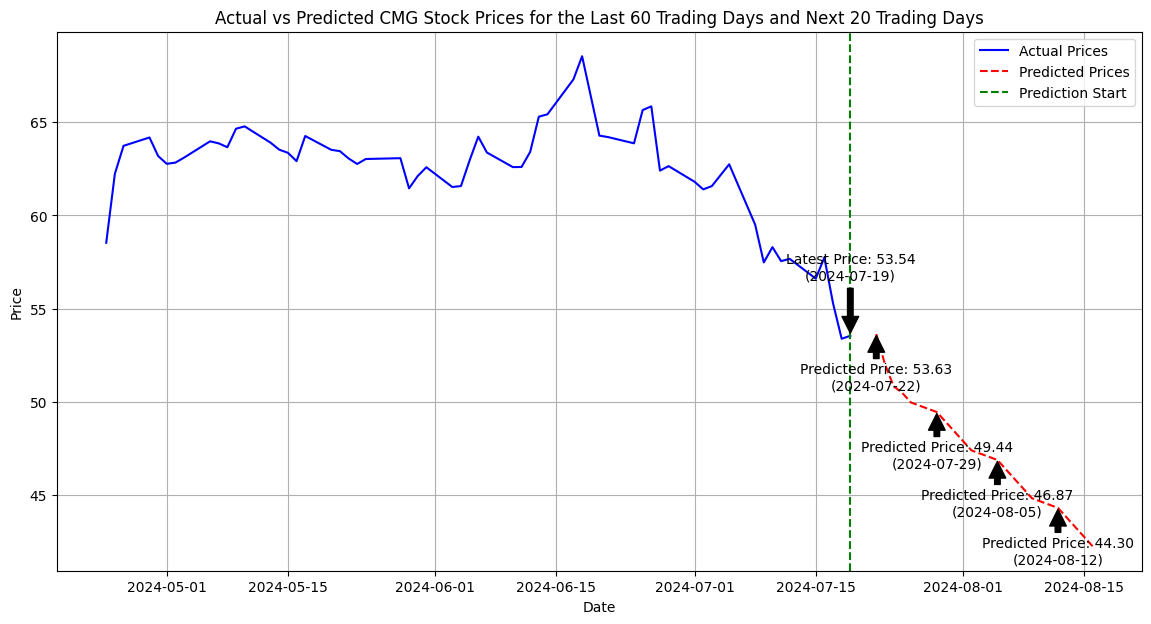

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import ta
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the most recent CMG stock data
file_path = '/kaggle/input/cmg-july-prices/CMG - jULY 19 2024.csv'
cmg_stock_data = pd.read_csv(file_path)
cmg_stock_data['Date'] = pd.to_datetime(cmg_stock_data['Date'])
cmg_stock_data = cmg_stock_data.sort_values(by='Date')

# Calculate the required features if they are missing
cmg_stock_data['Stoch_Osc'] = ta.momentum.stoch(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
cmg_stock_data['ADX'] = ta.trend.adx(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'])
cmg_stock_data['Stoch_Osc*ADX'] = cmg_stock_data['Stoch_Osc'] * cmg_stock_data['ADX']
cmg_stock_data['ADI'] = ta.volume.acc_dist_index(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])
cmg_stock_data['RSI'] = ta.momentum.rsi(cmg_stock_data['Adj Close'], window=14)
cmg_stock_data['MACD'] = ta.trend.macd_diff(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_High'] = ta.volatility.bollinger_hband(cmg_stock_data['Adj Close'])
cmg_stock_data['Bollinger_Low'] = ta.volatility.bollinger_lband(cmg_stock_data['Adj Close'])
cmg_stock_data['EMA_12'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=12)
cmg_stock_data['EMA_26'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=26)
cmg_stock_data['ATR'] = ta.volatility.average_true_range(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], window=14)
cmg_stock_data['Fourier'] = np.fft.fft(cmg_stock_data['Adj Close']).real
cmg_stock_data['CMF'] = ta.volume.chaikin_money_flow(cmg_stock_data['High'], cmg_stock_data['Low'], cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])
cmg_stock_data['FI'] = ta.volume.force_index(cmg_stock_data['Adj Close'], cmg_stock_data['Volume'])
cmg_stock_data['EMA_50'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=50)
cmg_stock_data['EMA_100'] = ta.trend.ema_indicator(cmg_stock_data['Adj Close'], window=100)
cmg_stock_data['Trend_Strength'] = cmg_stock_data['EMA_50'] / cmg_stock_data['EMA_100']
cmg_stock_data['EMA_12*Volume'] = cmg_stock_data['EMA_12'] * cmg_stock_data['Volume']

# Handle NaN values by filling them with appropriate imputation strategies
cmg_stock_data.ffill(inplace=True)
cmg_stock_data.bfill(inplace=True)

# Define key features based on RFECV
key_features = ['Stoch_Osc', 'Stoch_Osc*ADX', 'RSI', 'MACD', 'ATR', 'Fourier', 'EMA_12*Volume', 'CMF', 'FI', 'Trend_Strength']

# Prepare data with daily figures
cmg_stock_data['Adj Close % Change'] = cmg_stock_data['Adj Close'].pct_change()
cmg_stock_data['Adj Close $ Change'] = cmg_stock_data['Adj Close'].diff()
cmg_stock_data = cmg_stock_data.dropna().reset_index(drop=True)

# Define features (X) and target (y)
X = cmg_stock_data[key_features].iloc[1:]  # Skip the first row to match the target length
y_price_change = cmg_stock_data['Adj Close $ Change'][1:]  # Skip the first NaN value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Best hyperparameters from GridSearchCV
best_params = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 100,
    'subsample': 0.8
}

# Fit the GradientBoostingRegressor with best parameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_scaled, y_price_change)

# Predict the next 20 trading days
last_known_data = X_scaled[-1].reshape(1, -1)
predicted_price_changes = []
last_known_price = cmg_stock_data.iloc[-1]['Adj Close']

for i in range(20):
    predicted_price_change = best_model.predict(last_known_data)[0]
    predicted_price_changes.append(predicted_price_change)
    last_known_price += predicted_price_change
    new_data = np.append(last_known_data[0][1:], predicted_price_change).reshape(1, -1)
    last_known_data = scaler.transform(new_data)

# Calculate predicted prices
predicted_prices = cmg_stock_data['Adj Close'].tolist()
for change in predicted_price_changes:
    predicted_prices.append(predicted_prices[-1] + change)

# Create a DataFrame for plotting
predicted_dates = pd.date_range(start=cmg_stock_data['Date'].iloc[-1], periods=21, freq='B')[1:]
predicted_df = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted Price': predicted_prices[-20:]
})

# Filter the last 60 trading days and the predicted 20 trading days
plot_start_date = cmg_stock_data['Date'].iloc[-60]
actual_df = cmg_stock_data[cmg_stock_data['Date'] >= plot_start_date]

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_df['Date'], actual_df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Prices', color='red', linestyle='--')
plt.axvline(x=cmg_stock_data['Date'].iloc[-1], color='green', linestyle='--', label='Prediction Start')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted CMG Stock Prices for the Last 60 Trading Days and Next 20 Trading Days')
plt.legend()

# Annotate the latest stock price
latest_stock_price = actual_df.iloc[-1]['Adj Close']
latest_stock_date = actual_df.iloc[-1]['Date']
plt.annotate(f'Latest Price: {latest_stock_price:.2f}\n({latest_stock_date.date()})',
             xy=(latest_stock_date, latest_stock_price), xytext=(latest_stock_date, latest_stock_price + 3),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Annotate key dates and predicted prices with adjusted positions
for i, row in predicted_df.iterrows():
    if i % 5 == 0:  # Annotate every 5 days in the prediction period
        predicted_price = row['Predicted Price']
        predicted_date = row['Date']
        plt.annotate(f'Predicted Price: {predicted_price:.2f}\n({predicted_date.date()})',
                     xy=(predicted_date, predicted_price), xytext=(predicted_date, predicted_price - 3),
                     arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.grid(True)
plt.show()


Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-validation R^2 Score: 0.44923592470817786


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

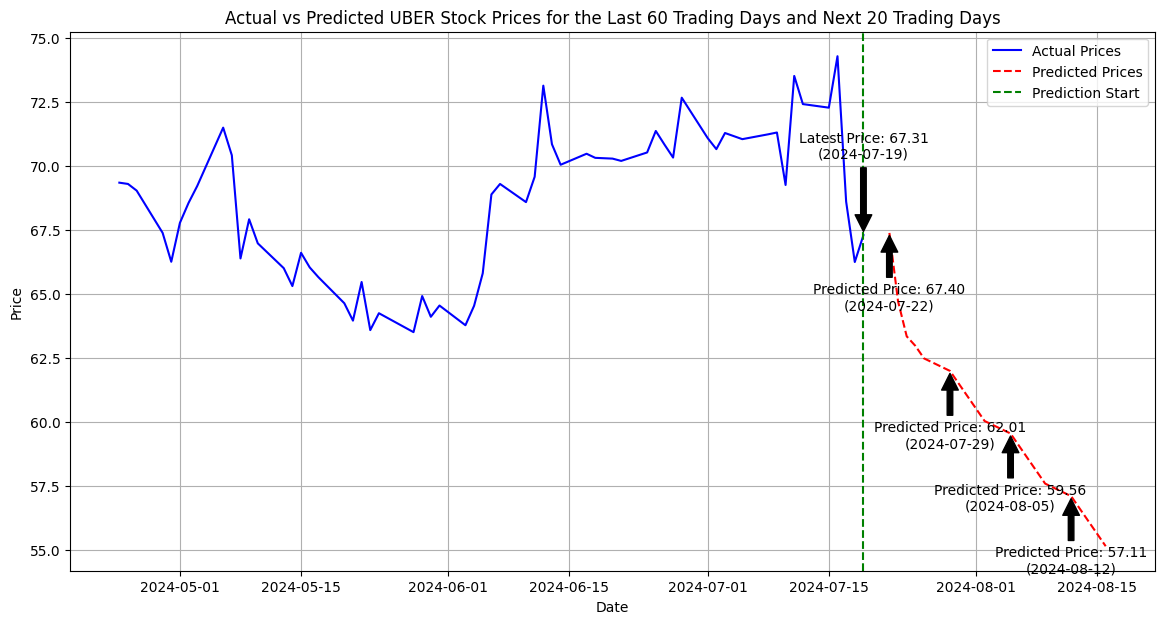

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import ta
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the most recent UBER stock data
file_path = '/kaggle/input/uber-july-price/UBER - July 19 2024.csv'
uber_stock_data = pd.read_csv(file_path)
uber_stock_data['Date'] = pd.to_datetime(uber_stock_data['Date'])
uber_stock_data = uber_stock_data.sort_values(by='Date')

# Calculate the required features if they are missing
uber_stock_data['Stoch_Osc'] = ta.momentum.stoch(uber_stock_data['High'], uber_stock_data['Low'], uber_stock_data['Adj Close'])
uber_stock_data['ADX'] = ta.trend.adx(uber_stock_data['High'], uber_stock_data['Low'], uber_stock_data['Adj Close'])
uber_stock_data['Stoch_Osc*ADX'] = uber_stock_data['Stoch_Osc'] * uber_stock_data['ADX']
uber_stock_data['ADI'] = ta.volume.acc_dist_index(uber_stock_data['High'], uber_stock_data['Low'], uber_stock_data['Adj Close'], uber_stock_data['Volume'])
uber_stock_data['RSI'] = ta.momentum.rsi(uber_stock_data['Adj Close'], window=14)
uber_stock_data['MACD'] = ta.trend.macd_diff(uber_stock_data['Adj Close'])
uber_stock_data['Bollinger_High'] = ta.volatility.bollinger_hband(uber_stock_data['Adj Close'])
uber_stock_data['Bollinger_Low'] = ta.volatility.bollinger_lband(uber_stock_data['Adj Close'])
uber_stock_data['EMA_12'] = ta.trend.ema_indicator(uber_stock_data['Adj Close'], window=12)
uber_stock_data['EMA_26'] = ta.trend.ema_indicator(uber_stock_data['Adj Close'], window=26)
uber_stock_data['ATR'] = ta.volatility.average_true_range(uber_stock_data['High'], uber_stock_data['Low'], uber_stock_data['Adj Close'], window=14)
uber_stock_data['Fourier'] = np.fft.fft(uber_stock_data['Adj Close']).real
uber_stock_data['CMF'] = ta.volume.chaikin_money_flow(uber_stock_data['High'], uber_stock_data['Low'], uber_stock_data['Adj Close'], uber_stock_data['Volume'])
uber_stock_data['FI'] = ta.volume.force_index(uber_stock_data['Adj Close'], uber_stock_data['Volume'])
uber_stock_data['EMA_50'] = ta.trend.ema_indicator(uber_stock_data['Adj Close'], window=50)
uber_stock_data['EMA_100'] = ta.trend.ema_indicator(uber_stock_data['Adj Close'], window=100)
uber_stock_data['Trend_Strength'] = uber_stock_data['EMA_50'] / uber_stock_data['EMA_100']
uber_stock_data['EMA_12*Volume'] = uber_stock_data['EMA_12'] * uber_stock_data['Volume']

# Handle NaN values by filling them with appropriate imputation strategies
uber_stock_data.ffill(inplace=True)
uber_stock_data.bfill(inplace=True)

# Define key features based on RFECV
key_features = ['Stoch_Osc', 'Stoch_Osc*ADX', 'RSI', 'MACD', 'ATR', 'Fourier', 'EMA_12*Volume', 'CMF', 'FI', 'Trend_Strength']

# Prepare data with daily figures
uber_stock_data['Adj Close % Change'] = uber_stock_data['Adj Close'].pct_change()
uber_stock_data['Adj Close $ Change'] = uber_stock_data['Adj Close'].diff()
uber_stock_data = uber_stock_data.dropna().reset_index(drop=True)

# Define features (X) and target (y)
X = uber_stock_data[key_features].iloc[1:]  # Skip the first row to match the target length
y_price_change = uber_stock_data['Adj Close $ Change'][1:]  # Skip the first NaN value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Initialize the model
model = GradientBoostingRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_scaled, y_price_change)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation R^2 Score: {grid_search.best_score_}")

# Fit the GradientBoostingRegressor with best parameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_scaled, y_price_change)

# Predict the next 20 trading days
last_known_data = X_scaled[-1].reshape(1, -1)
predicted_price_changes = []
last_known_price = uber_stock_data.iloc[-1]['Adj Close']

for i in range(20):
    predicted_price_change = best_model.predict(last_known_data)[0]
    predicted_price_changes.append(predicted_price_change)
    last_known_price += predicted_price_change
    new_data = np.append(last_known_data[0][1:], predicted_price_change).reshape(1, -1)
    last_known_data = scaler.transform(new_data)

# Calculate predicted prices
predicted_prices = uber_stock_data['Adj Close'].tolist()
for change in predicted_price_changes:
    predicted_prices.append(predicted_prices[-1] + change)

# Create a DataFrame for plotting
predicted_dates = pd.date_range(start=uber_stock_data['Date'].iloc[-1], periods=21, freq='B')[1:]
predicted_df = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted Price': predicted_prices[-20:]
})

# Filter the last 60 trading days and the predicted 20 trading days
plot_start_date = uber_stock_data['Date'].iloc[-60]
actual_df = uber_stock_data[uber_stock_data['Date'] >= plot_start_date]

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_df['Date'], actual_df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Prices', color='red', linestyle='--')
plt.axvline(x=uber_stock_data['Date'].iloc[-1], color='green', linestyle='--', label='Prediction Start')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted UBER Stock Prices for the Last 60 Trading Days and Next 20 Trading Days')
plt.legend()

# Annotate the latest stock price
latest_stock_price = actual_df.iloc[-1]['Adj Close']
latest_stock_date = actual_df.iloc[-1]['Date']
plt.annotate(f'Latest Price: {latest_stock_price:.2f}\n({latest_stock_date.date()})',
             xy=(latest_stock_date, latest_stock_price), xytext=(latest_stock_date, latest_stock_price + 3),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Annotate key dates and predicted prices with adjusted positions
for i, row in predicted_df.iterrows():
    if i % 5 == 0:  # Annotate every 5 days in the prediction period
        predicted_price = row['Predicted Price']
        predicted_date = row['Date']
        plt.annotate(f'Predicted Price: {predicted_price:.2f}\n({predicted_date.date()})',
                     xy=(predicted_date, predicted_price), xytext=(predicted_date, predicted_price - 3),
                     arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.grid(True)
plt.show()
